### Great American Coffee Taste Test

**Survey responses from ~4,000 Americans after a blind coffee taste test.**

- **Dataset Menu**
  - Single table
  - Data structure

- **Number of Records:** 4043
- **Number of Fields:** 111


In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
import re
import plot_likert


In [2]:
#data load
data = pd.read_csv('E:\\__Pojects__\\Maven project\\GACTT_RESULTS_ANONYMIZED_v2.csv')

In [3]:
data.head()

Age cups per day drink coffee (home) drink coffee (office)  \
0  18-24 years old          NaN                 NaN                   NaN   
1  25-34 years old          NaN                 NaN                   NaN   
2  25-34 years old          NaN                 NaN                   NaN   
3  35-44 years old          NaN                 NaN                   NaN   
4  25-34 years old          NaN                 NaN                   NaN   

  drink coffee (On the go) drink coffee (cafe) drink coffee (others)  \
0                      NaN                 NaN                   NaN   
1                      NaN                 NaN                   NaN   
2                      NaN                 NaN                   NaN   
3                      NaN                 NaN                   NaN   
4                      NaN                 NaN                   NaN   

  brew coffee (Pour over) brew coffee (French press) brew coffee (Espresso)  \
0                     NaN                        NaN                    NaN   
1                   False                      False                  False   
2                   False                      False                  False   
3                   False                      False                  False   
4                    True                      False                  False   

   ...  most willing to pay getting good value ( buy from café)  \
0  ...                  NaN                                 NaN   
1  ...                  NaN                                 NaN   
2  ...                  NaN                                 NaN   
3  ...                  NaN                                 NaN   
4  ...                  NaN                                 NaN   

  spent on coffee equipment past 5 years  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   getting good value  regards to your coffee equipment Gender Education   \
0                                                NaN       NaN        NaN   
1                                                NaN       NaN        NaN   
2                                                NaN       NaN        NaN   
3                                                NaN       NaN        NaN   
4                                                NaN       NaN        NaN   

  Ethnicity/Race Employment Status Number of Children Political Affiliation  
0            NaN               NaN                NaN                   NaN  
1            NaN               NaN                NaN                   NaN  
2            NaN               NaN                NaN                   NaN  
3            NaN               NaN                NaN                   NaN  
4            NaN               NaN                NaN                   NaN  

[5 rows x 89 columns]

In [4]:
# remove text from age column
data["Age"] = data["Age"].str.split(" ").str[0]

In [5]:
nan_percentage = (data.isnull().sum() / len(data)) * 100
nan_percentage_df = pd.DataFrame({'Column': nan_percentage.index, 'NaN Percentage': nan_percentage.values})
nan_percentage_df


Column  NaN Percentage
0                        Age        0.668979
1               cups per day        2.155600
2        drink coffee (home)        1.560951
3      drink coffee (office)        1.560951
4   drink coffee (On the go)        1.560951
..                       ...             ...
84                Education        14.816650
85            Ethnicity/Race       15.312190
86         Employment Status       15.287413
87        Number of Children       15.609514
88     Political Affiliation       18.508424

[89 rows x 2 columns]

In [6]:
# Drop rows with non-finite values in 'coffee expertise' column
data = data.dropna(subset=['coffee expertise'])

# Convert the 'coffee expertise' column to integers
data['coffee expertise'] = data['coffee expertise'].astype(int)

# Convert the 'coffee expertise' column to string type
data['coffee expertise'] = data['coffee expertise'].astype(str)

In [7]:
data[' favorite coffee drink'] = data[' favorite coffee drink'].replace('Blended drink (e.g. Frappuccino)', 'Blended drink')

# Target Audience

### Demographics 

1.Age

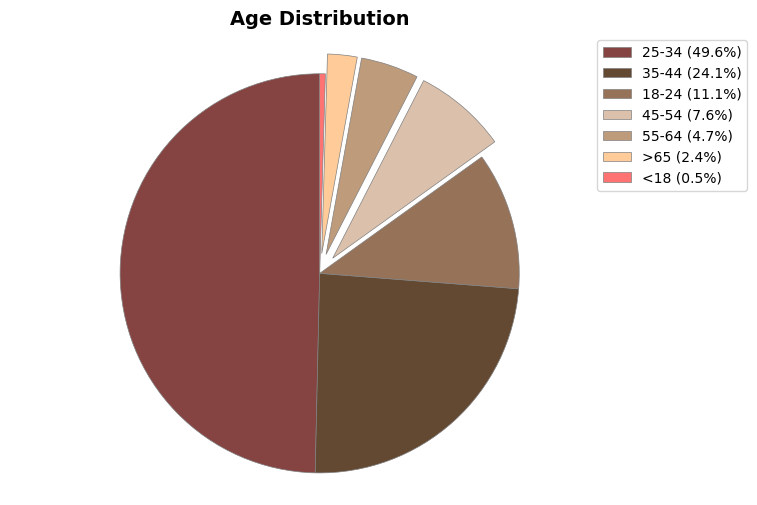

In [8]:
# Count the occurrences of each Age category
Age_counts = data['Age'].value_counts()

# Calculate percentages for each age category
total_count = Age_counts.sum()
percentages = [(count / total_count) * 100 for count in Age_counts.values]

# Define color palette
colors=['#854442','#634832','#967259','#dbc1ac','#be9b7b','#ffcc99','#ff7373']

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the pie chart for age
explode = (0, 0, 0, 0.1, 0.1, 0.1, 0)  # Explode slice
patches, _, _ = plt.pie(Age_counts, startangle=90, colors=colors, explode=explode, autopct='', labels=None)

# Add shadow
for patch in patches:
    patch.set_linewidth(0.5)
    patch.set_edgecolor('gray')

# Set title
plt.title('Age Distribution', fontsize=14, fontweight='bold')

# Add legend with labels and percentages
legend_labels = [f'{age} ({percentage:.1f}%)' for age, percentage in zip(Age_counts.index, percentages)]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


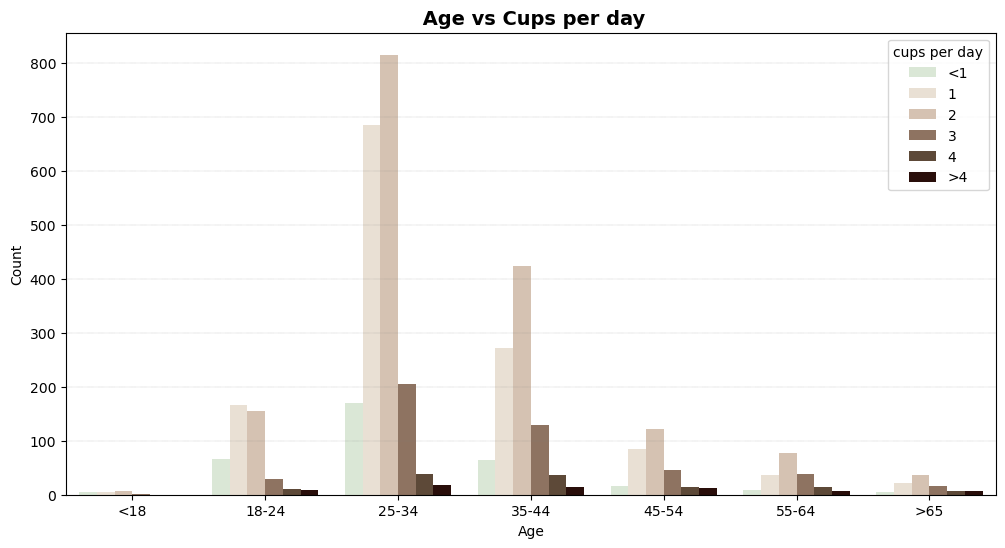

In [9]:
# Define the desired order for 'Age' and 'cups per day'
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '>65']
cups_order = ['<1', '1', '2', '3', '4', '>4']

# Define a custom color palette for 'cups per day'
coffee_palette = {'<1': '#d9ead3', '1': '#ece0d1', '2': '#dbc1ac', '3': '#967259', '4': '#634832', '>4': '#2e0a05'}

# Create a figure and axes
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age', hue='cups per day', data=data, order=age_order, hue_order=cups_order, palette=coffee_palette)


# Add loosely dotted lines every 100 cups
for y in np.arange(100, ax.get_ylim()[1], 100):
    ax.axhline(y, linestyle=':', color='gray', linewidth=0.3)

plt.title(' Age vs Cups per day',fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [10]:
# Preprocess the data to calculate counts of favorite coffee drinks within each age range
coffee_counts = data.groupby(['Age', ' favorite coffee drink']).size().unstack(fill_value=0)

# Set the index of coffee_counts to the custom age order
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '>65']
coffee_counts = coffee_counts.reindex(age_order)

# Reset index to ensure 'Age' is a column
coffee_counts.reset_index(inplace=True)

# Melt the DataFrame to have 'Age' as one variable and 'favorite coffee drink' as another
melted_df = coffee_counts.melt(id_vars='Age', var_name='Favorite Coffee Drink', value_name='Count')

# Create the sunburst chart with a hot-like palette
fig = px.sunburst(melted_df, path=['Age', 'Favorite Coffee Drink'], values='Count',
                  color_discrete_sequence=px.colors.sequential.RdBu)

# Update layout for better visualization
fig.update_layout(title=dict(text='Distribution of Favorite Coffee Drinks Across Age Categories', x=0.5, font=dict(size=16, color='black', family='Bold')),
                  margin=dict(t=50, l=0, r=0, b=0))

# Show the plot
fig.show()


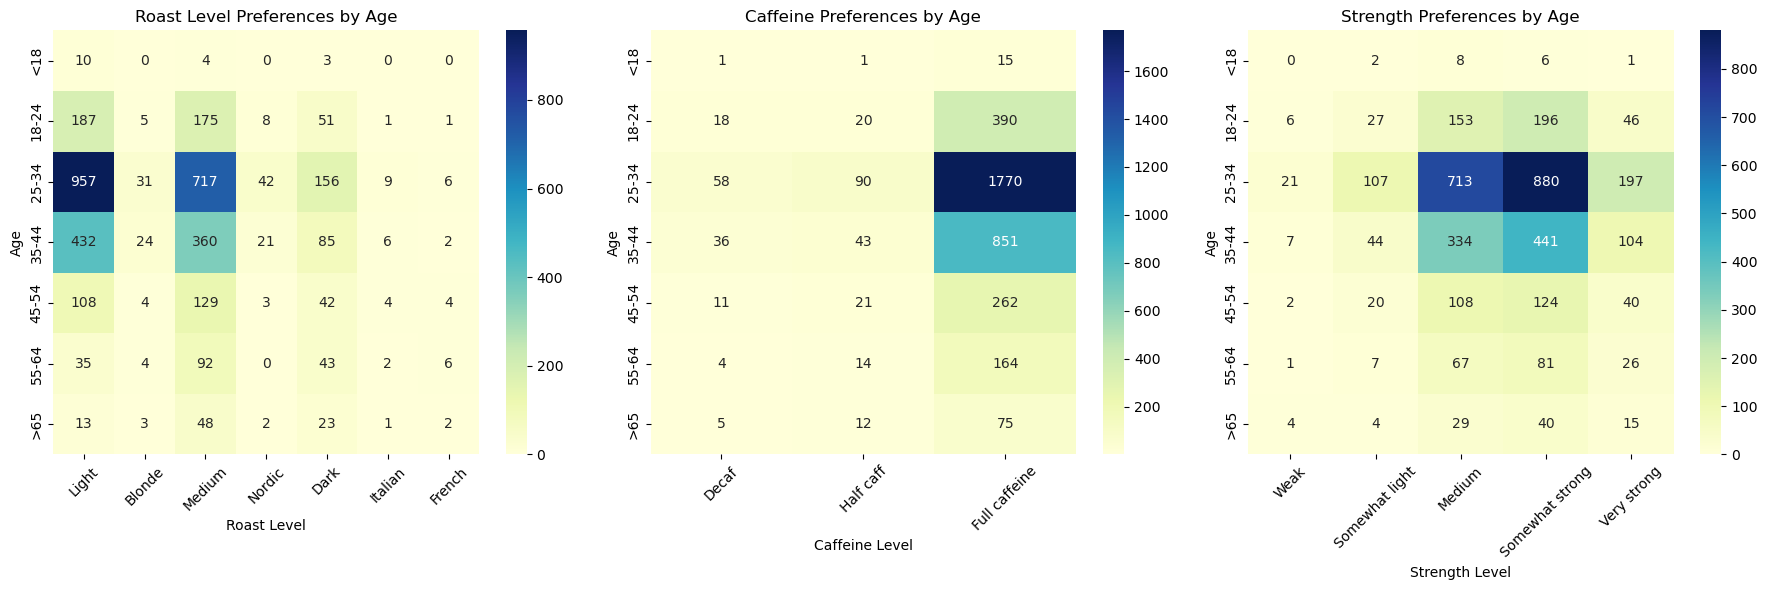

In [11]:
# Define the preference categories and their order
roast_levels = ['Light', 'Blonde', 'Medium', 'Nordic', 'Dark', 'Italian', 'French']
strengths = ['Weak', 'Somewhat light', 'Medium', 'Somewhat strong', 'Very strong']
caffeine_preferences = ['Decaf', 'Half caff', 'Full caffeine']


# Define the desired order for age categories
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '>65']

# Convert the 'Age' column to an ordered categorical variable with the specified order
data['Age'] = pd.Categorical(data['Age'], categories=age_order, ordered=True)

# Drop rows with missing values
data_cleaned = data.dropna(subset=['Age', 'roast level  ',' caffeine in coffee', 'strong level '])

# Reorder the columns for the pivot table
columns_order = roast_levels + strengths + caffeine_preferences

# Define the size of the plot
plt.figure(figsize=(18, 6))

# Create heatmap for roast level
plt.subplot(1, 3, 1)
heatmap_data_roast = data_cleaned.pivot_table(index='Age', columns='roast level  ', aggfunc='size')[roast_levels]
sns.heatmap(heatmap_data_roast, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Roast Level Preferences by Age')
plt.xlabel('Roast Level')
plt.ylabel('Age')
plt.xticks(rotation=45)

# Create heatmap for caffeine in coffee
plt.subplot(1, 3, 2)
heatmap_data_caffeine = data_cleaned.pivot_table(index='Age', columns=' caffeine in coffee', aggfunc='size')[caffeine_preferences]
sns.heatmap(heatmap_data_caffeine, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Caffeine Preferences by Age')
plt.xlabel('Caffeine Level')
plt.ylabel('Age')
plt.xticks(rotation=45)

# Create heatmap for strong level
plt.subplot(1, 3, 3)
heatmap_data_strong = data_cleaned.pivot_table(index='Age', columns='strong level ', aggfunc='size')[strengths]
sns.heatmap(heatmap_data_strong, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Strength Preferences by Age')
plt.xlabel('Strength Level')
plt.ylabel('Age')
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


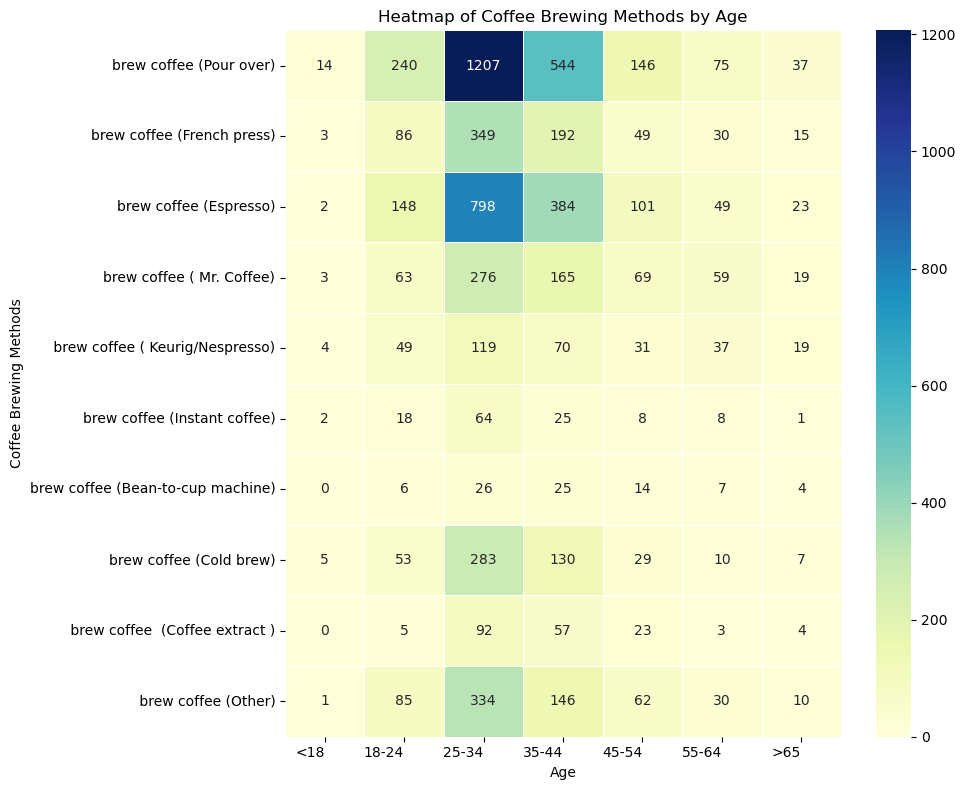

In [12]:
# Define column names exactly as they appear in the DataFrame
brew_coffee_home = ['brew coffee (Pour over)',
       'brew coffee (French press)', 'brew coffee (Espresso)',
       'brew coffee ( Mr. Coffee)', ' brew coffee ( Keurig/Nespresso)',
       'brew coffee (Instant coffee)', 'brew coffee (Bean-to-cup machine)',
       'brew coffee (Cold brew)', ' brew coffee  (Coffee extract )',
       ' brew coffee (Other)']

# Calculate counts of each coffee brewing method within each age range
brew_counts = data.groupby('Age')[brew_coffee_home].sum()

# Reorder the columns according to your preference if needed
# brew_counts = brew_counts[['brew coffee (Pour over)', 'brew coffee (French press)', ...]]

# Transpose the DataFrame to have 'Age' on the y-axis and 'Coffee Brewing Methods' on the x-axis
brew_counts = brew_counts.T


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(brew_counts, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Heatmap of Coffee Brewing Methods by Age')
plt.xlabel('Age')
plt.ylabel('Coffee Brewing Methods')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

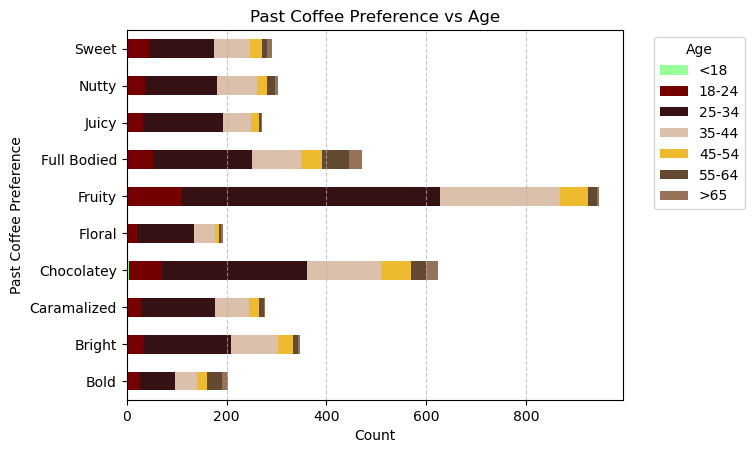

In [13]:
# Group the data by 'Gender' and 'Before coffee preference', and count the occurrences
Age_counts = data.groupby(['Age', 'Before coffee preference']).size().unstack(fill_value=0)

# Transpose the DataFrame
age_counts_transposed = Age_counts.T

# Define the custom colormap
colors =['#99ff99', '#740001', '#351113', '#dbc1ac', '#eeba30','#634832', '#967259']


# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
age_counts_transposed.plot(kind='barh', stacked=True, color=colors)
plt.title('Past Coffee Preference vs Age')
plt.xlabel('Count')
plt.ylabel('Past Coffee Preference')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


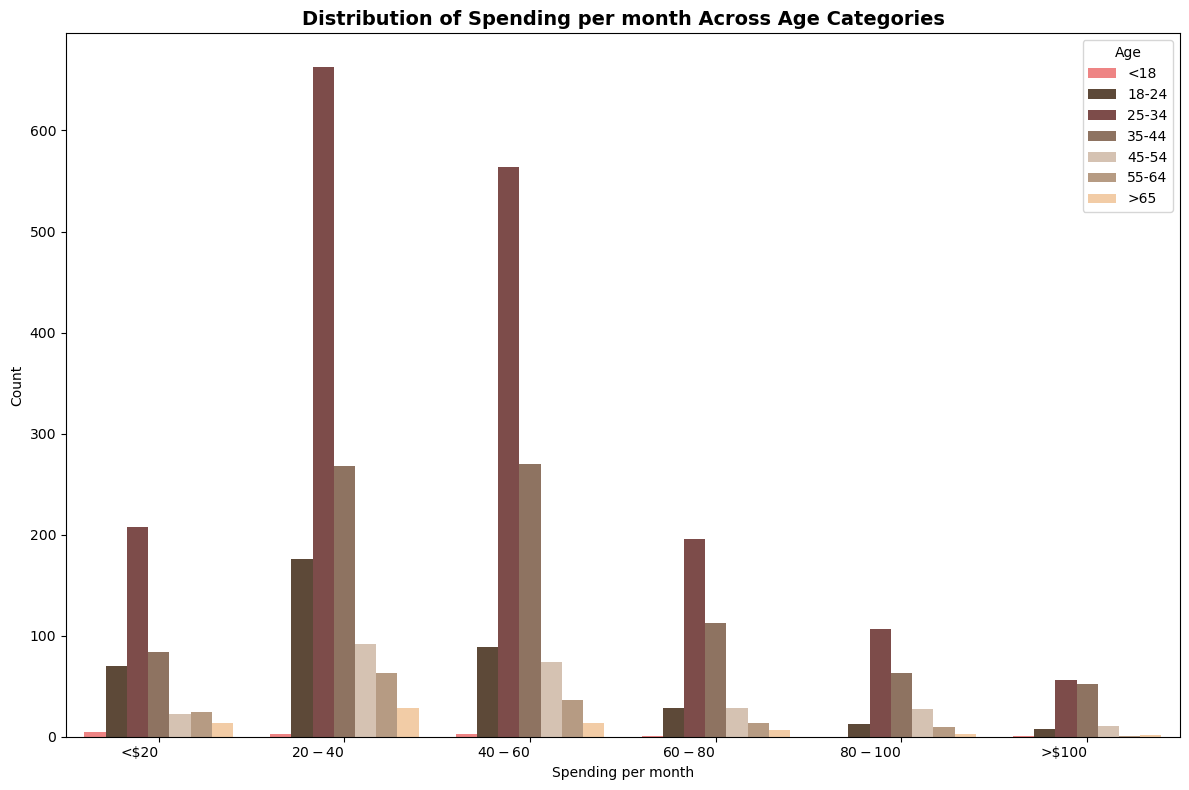

In [14]:

# Define the custom order of spending per month categories
spending_order = ['<$20','$20-$40', '$40-$60', '$60-$80', '$80-$100', '>$100']

# Define the custom color palette
colors = ['#ff7373', '#634832','#854442','#967259', '#dbc1ac', '#be9b7b', '#ffcc99']

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot a count plot using seaborn with custom colors
sns.countplot(x='spending per month', hue='Age', data=data,order=spending_order,palette=colors)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

    
# Set the title and labels
plt.title('Distribution of Spending per month Across Age Categories',fontsize=14, fontweight='bold')
plt.xlabel('Spending per month')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


2.Gender

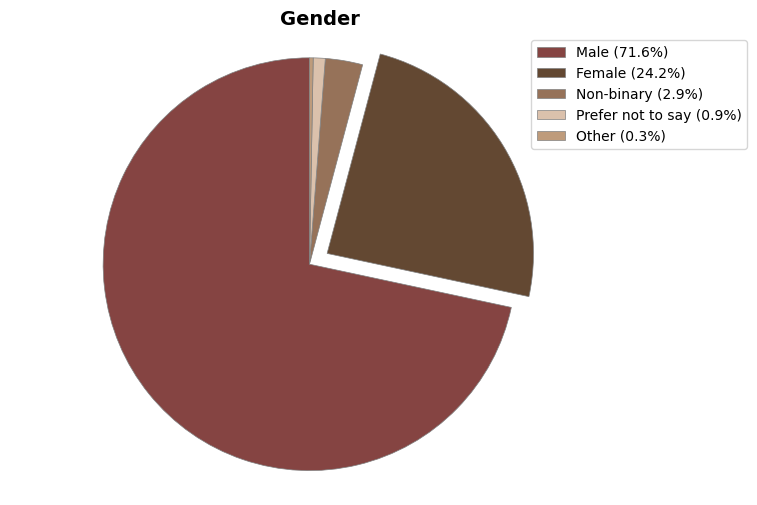

In [15]:
# Normalize gender labels by converting them to lowercase
data['Gender'] = data['Gender'].str.lower()

# Count the occurrences of each gender
gender_counts = data['Gender'].value_counts()

# Calculate percentages for each gender
percentages = [f'{count / gender_counts.sum() * 100:.1f}%' for count in gender_counts]

# Define color palette
colors=['#854442','#634832','#967259','#dbc1ac','#be9b7b','#ffcc99','#ff7373']

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the pie chart for gender
explode = (0, 0.1, 0, 0, 0)  # Explode slice
patches, _, _ = plt.pie(gender_counts, startangle=90, colors=colors, explode=explode, autopct='', labels=None)

# Add shadow
for patch in patches:
    patch.set_linewidth(0.5)
    patch.set_edgecolor('gray')

# Set title
plt.title('Gender', fontsize=14, fontweight='bold')

# Add legend with labels and percentages
legend_labels = [f'{gender.capitalize()} ({percentage})' for gender, percentage in zip(gender_counts.index, percentages)]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.2, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


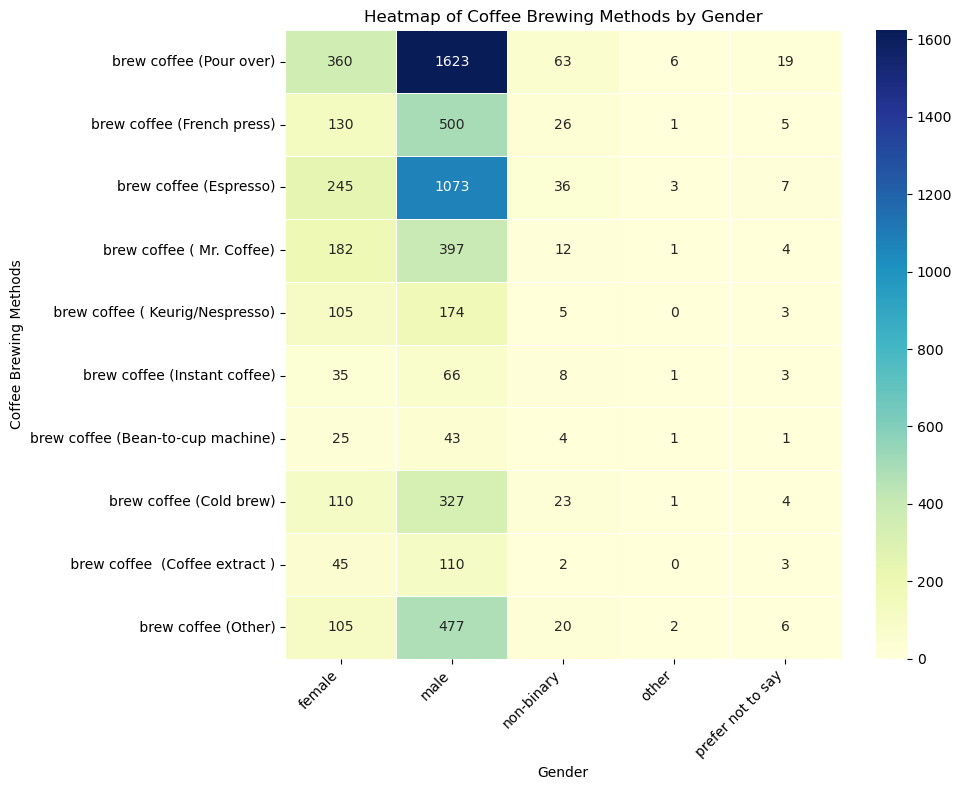

In [16]:
# Define column names exactly as they appear in the DataFrame
brew_coffee_home = ['brew coffee (Pour over)',
       'brew coffee (French press)', 'brew coffee (Espresso)',
       'brew coffee ( Mr. Coffee)', ' brew coffee ( Keurig/Nespresso)',
       'brew coffee (Instant coffee)', 'brew coffee (Bean-to-cup machine)',
       'brew coffee (Cold brew)', ' brew coffee  (Coffee extract )',
       ' brew coffee (Other)']

# Calculate counts of each coffee brewing method within each age range
brew_counts = data.groupby('Gender')[brew_coffee_home].sum()

# Reorder the columns according to your preference if needed
# brew_counts = brew_counts[['brew coffee (Pour over)', 'brew coffee (French press)', ...]]

# Transpose the DataFrame to have 'Age' on the y-axis and 'Coffee Brewing Methods' on the x-axis
brew_counts = brew_counts.T


# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(brew_counts, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Heatmap of Coffee Brewing Methods by Gender')
plt.xlabel('Gender')
plt.ylabel('Coffee Brewing Methods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


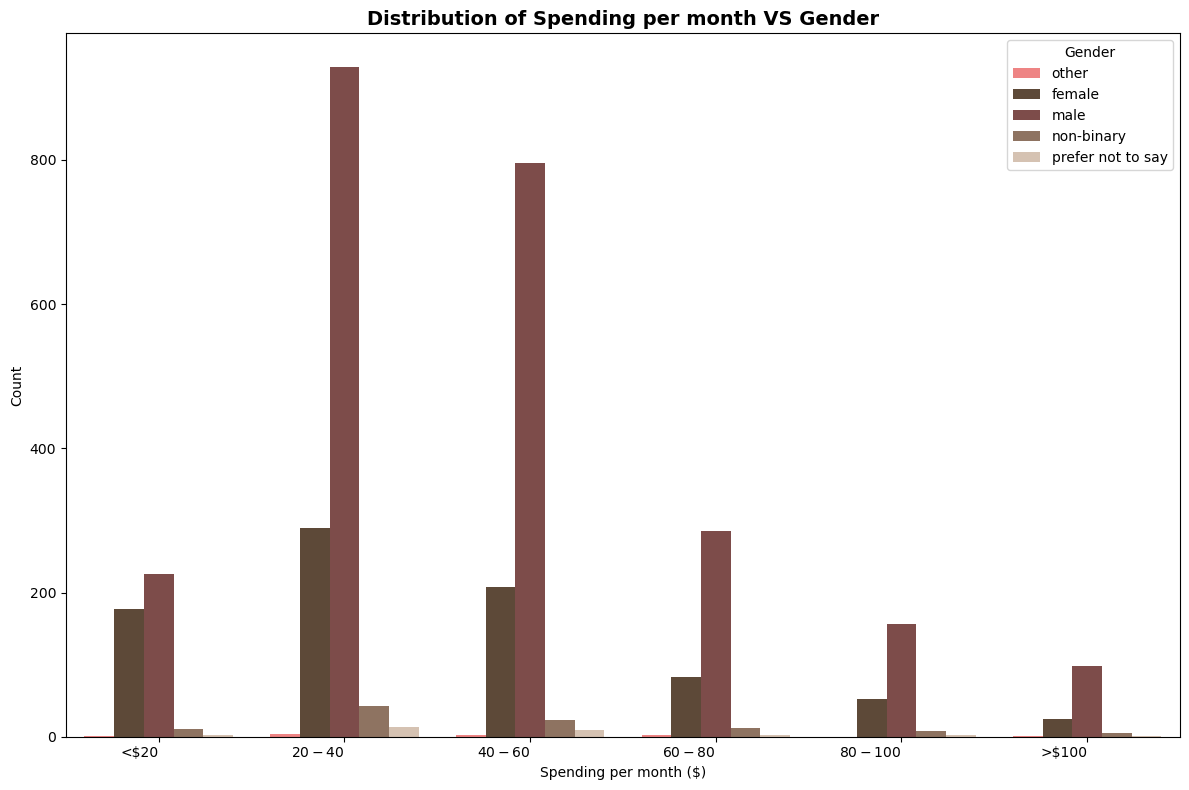

In [17]:

# Define the custom order of spending per month categories
spending_order = ['<$20','$20-$40', '$40-$60', '$60-$80', '$80-$100', '>$100']

# Define the custom color palette
colors = ['#ff7373', '#634832','#854442','#967259', '#dbc1ac', '#be9b7b', '#ffcc99']

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot a count plot using seaborn with custom order and colors
sns.countplot(x='spending per month', hue='Gender', data=data, order=spending_order, palette=colors)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='right')
    
# Set the title and labels
plt.title('Distribution of Spending per month VS Gender', fontsize=14, fontweight='bold')
plt.xlabel('Spending per month ($)')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

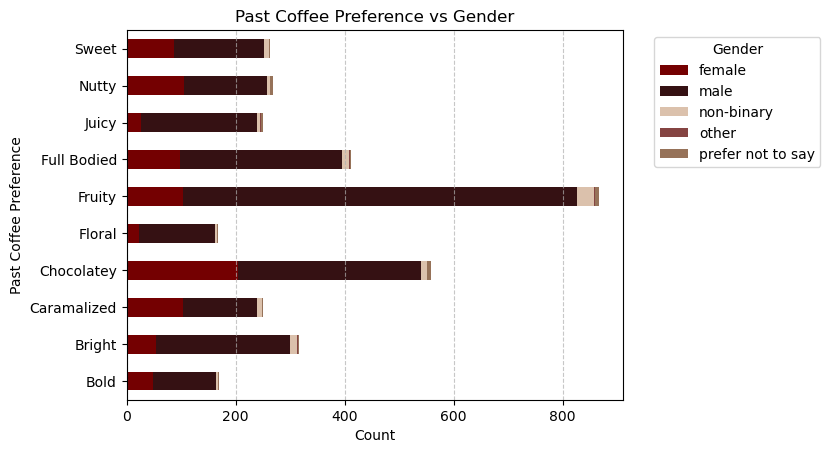

In [18]:
# Group the data by 'Gender' and 'Before coffee preference', and count the occurrences
gender_preference_counts = data.groupby(['Gender', 'Before coffee preference']).size().unstack(fill_value=0)

# Transpose the DataFrame
gender_preference_counts_transposed = gender_preference_counts.T

# Define the custom colormap
colors = ['#740001', '#351113', '#dbc1ac', '#854442', '#967259']


# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
gender_preference_counts_transposed.plot(kind='barh', stacked=True, color=colors)
plt.title('Past Coffee Preference vs Gender')
plt.xlabel('Count')
plt.ylabel('Past Coffee Preference')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


3.Education

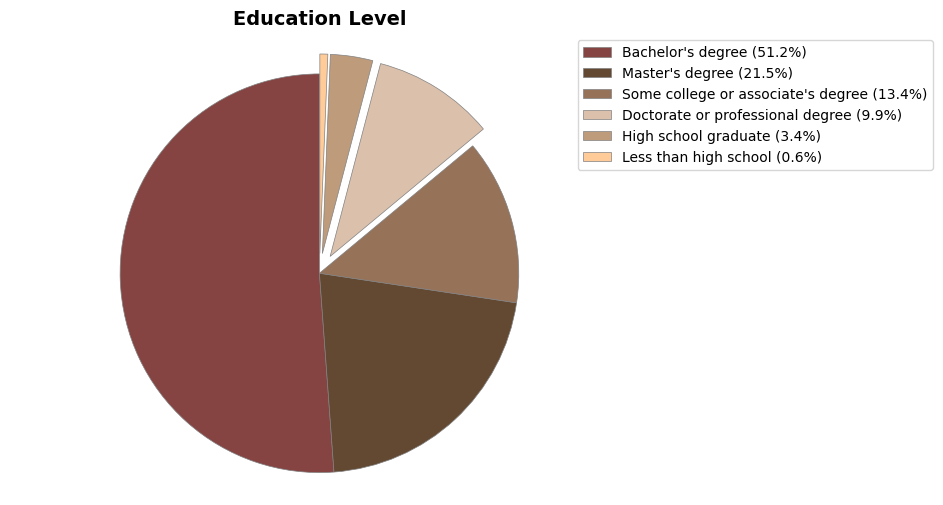

In [19]:
# Normalize gender labels by converting them to lowercase
data['Education '] = data['Education '].str.lower()

# Count the occurrences of each gender
Education_counts = data['Education '].value_counts()

# Calculate percentages for each gender
percentages = [f'{count / Education_counts.sum() * 100:.1f}%' for count in Education_counts]

# Define color palette
colors=['#854442','#634832','#967259','#dbc1ac','#be9b7b','#ffcc99','#ff7373']

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the pie chart for education
explode = (0, 0, 0, 0.1, 0.1,0.1)  # Explode slice
patches, _, _ = plt.pie(Education_counts, startangle=90, colors=colors, explode=explode, autopct='', labels=None)

# Add shadow
for patch in patches:
    patch.set_linewidth(0.5)
    patch.set_edgecolor('gray')

# Set title
plt.title('Education Level', fontsize=14, fontweight='bold')

# Add legend with labels and percentages
legend_labels = [f'{education.capitalize()} ({percentage})' for education, percentage in zip(Education_counts.index, percentages)]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


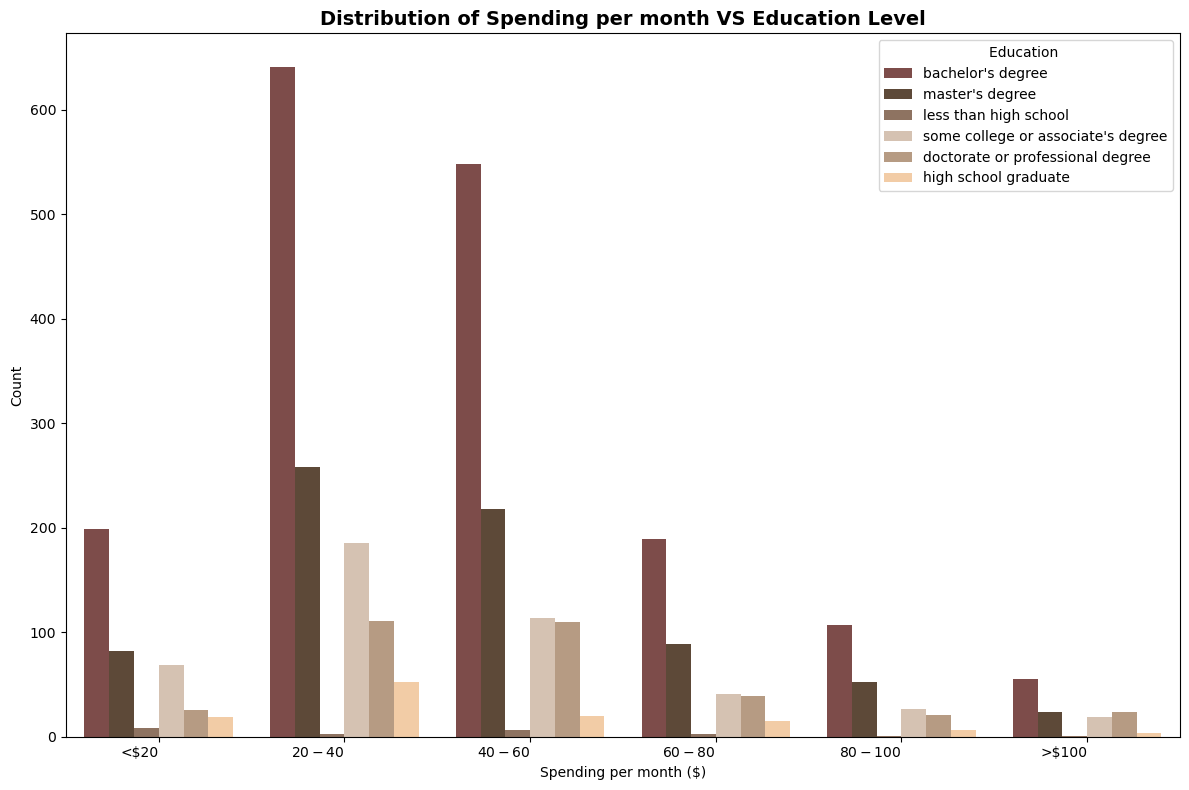

In [20]:
# Define the custom order of spending per month categories
spending_order = ['<$20','$20-$40', '$40-$60', '$60-$80', '$80-$100', '>$100']

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot a count plot using seaborn with custom order and colors
sns.countplot(x='spending per month', hue='Education ', data=data,order = spending_order,palette=colors)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='right')
    
# Set the title and labels
plt.title('Distribution of Spending per month VS Education Level', fontsize=14, fontweight='bold')
plt.xlabel('Spending per month ($)')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

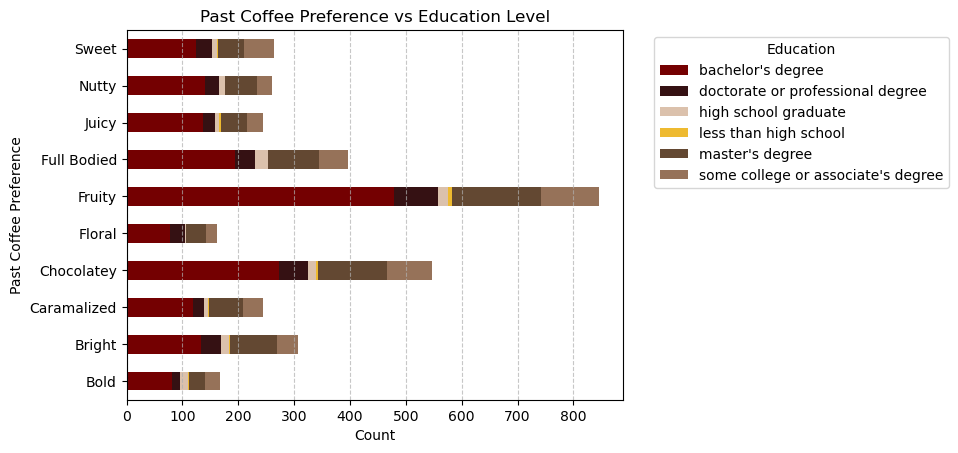

In [21]:
# Group the data by 'Gender' and 'Before coffee preference', and count the occurrences
education_preference_counts = data.groupby(['Education ', 'Before coffee preference']).size().unstack(fill_value=0)

# Transpose the DataFrame
education_preference_counts_transposed = education_preference_counts.T

# Define the custom colormap
colors = ['#740001', '#351113', '#dbc1ac', '#eeba30','#634832', '#967259']


# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
education_preference_counts_transposed.plot(kind='barh', stacked=True, color=colors)
plt.title('Past Coffee Preference vs Education Level')
plt.xlabel('Count')
plt.ylabel('Past Coffee Preference')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


4.Ethnicity

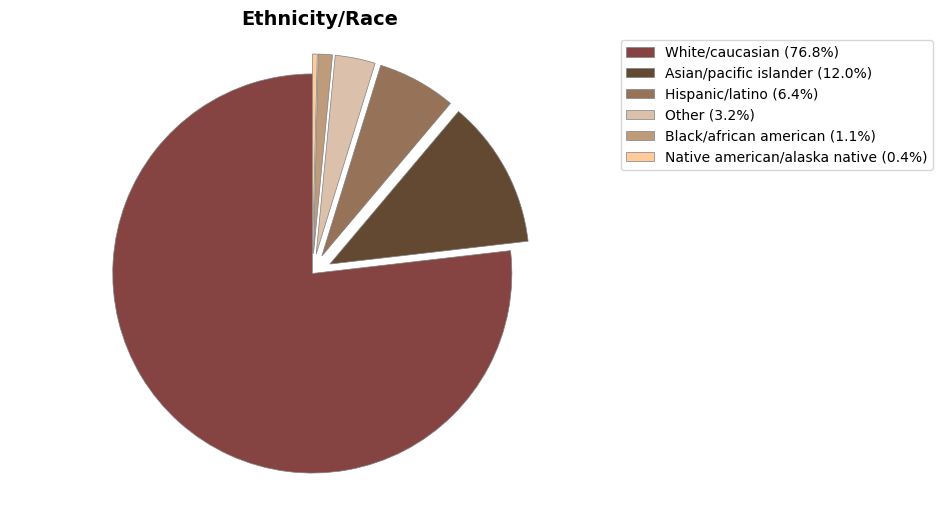

In [22]:
# Normalize gender labels by converting them to lowercase
data['Ethnicity/Race'] = data['Ethnicity/Race'].str.lower()

# Count the occurrences of each gender
Ethnicity_counts = data['Ethnicity/Race'].value_counts()

# Calculate percentages for each gender
percentages = [f'{count / Ethnicity_counts.sum() * 100:.1f}%' for count in Ethnicity_counts]

# Define color palette
colors=['#854442','#634832','#967259','#dbc1ac','#be9b7b','#ffcc99','#ff7373']

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the pie chart for ethnicity
explode = (0, 0.1, 0.1, 0.1, 0.1,0.1)  # Explode slice
patches, _, _ = plt.pie(Ethnicity_counts, startangle=90, colors=colors, explode=explode, autopct='', labels=None)

# Add shadow
for patch in patches:
    patch.set_linewidth(0.5)
    patch.set_edgecolor('gray')

# Set title
plt.title('Ethnicity/Race', fontsize=14, fontweight='bold')

# Add legend with labels and percentages
legend_labels = [f'{ethnicity.capitalize()} ({percentage})' for ethnicity, percentage in zip(Ethnicity_counts.index, percentages)]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


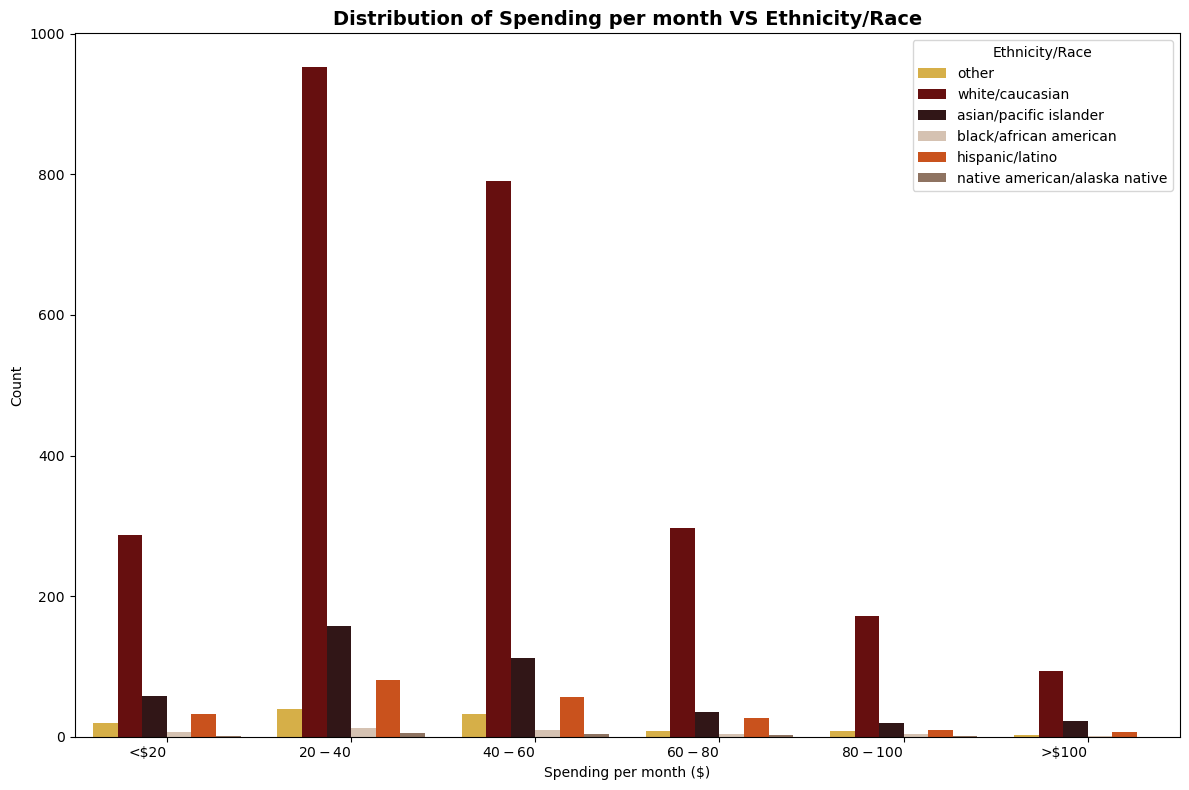

In [23]:
# Define the custom order of spending per month categories
spending_order = ['<$20','$20-$40', '$40-$60', '$60-$80', '$80-$100', '>$100']

#palette creation
colors=['#eeba30', '#740001','#351113', '#dbc1ac','#e64700', '#967259']

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot a count plot using seaborn with custom order and colors
sns.countplot(x='spending per month', hue='Ethnicity/Race', data=data,order = spending_order,palette=colors)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='right')
    
# Set the title and labels
plt.title('Distribution of Spending per month VS Ethnicity/Race', fontsize=14, fontweight='bold')
plt.xlabel('Spending per month ($)')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


5.Employment

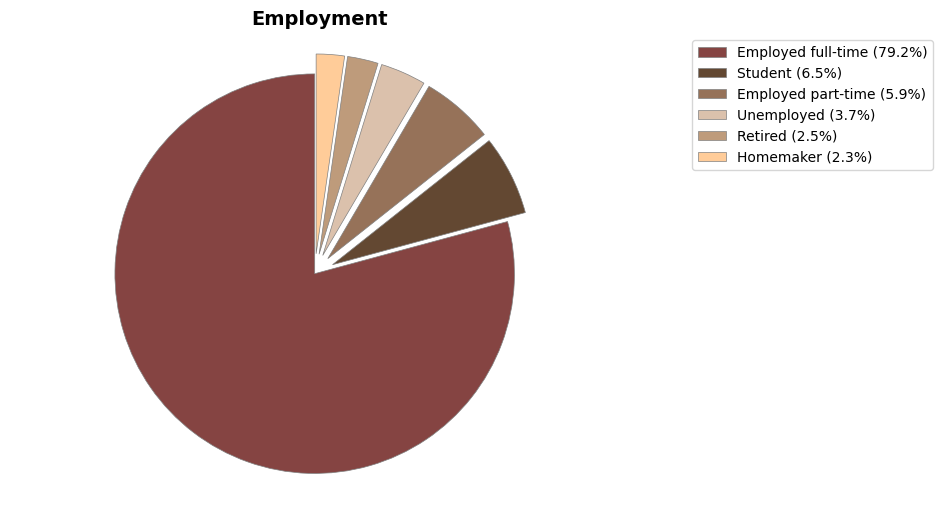

In [24]:
# Normalize gender labels by converting them to lowercase
data['Employment Status'] = data['Employment Status'].str.lower()

# Count the occurrences of each gender
Employment_counts = data['Employment Status'].value_counts()

# Calculate percentages for each gender
percentages = [f'{count / Employment_counts.sum() * 100:.1f}%' for count in Employment_counts]

# Define color palette
colors=['#854442','#634832','#967259','#dbc1ac','#be9b7b','#ffcc99','#ff7373']

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the pie chart for employment
explode = (0, 0.1, 0.1, 0.1, 0.1,0.1)  # Explode slice
patches, _, _ = plt.pie(Employment_counts, startangle=90, colors=colors, explode=explode, autopct='', labels=None)

# Add shadow
for patch in patches:
    patch.set_linewidth(0.5)
    patch.set_edgecolor('gray')

# Set title
plt.title('Employment', fontsize=14, fontweight='bold')

# Add legend with labels and percentages
legend_labels = [f'{employment.capitalize()} ({percentage})' for employment, percentage in zip(Employment_counts.index, percentages)]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


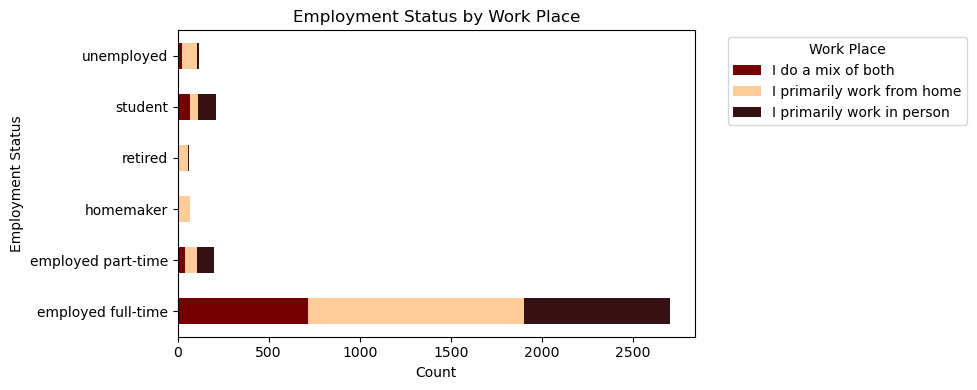

In [25]:
# Crosstab to get the counts
cross_tab = pd.crosstab(data['work place'], data['Employment Status'])

# Define the custom colormap
colors = ['#740001', '#ffcc99','#351113']

# Transpose the cross-tabulation table
cross_tab_transposed = cross_tab.T

# Plotting the horizontal stacked bar chart
cross_tab_transposed.plot(kind='barh', stacked=True, figsize=(10, 4),color=colors)

# Adding labels and title
plt.title('Employment Status by Work Place')
plt.ylabel('Employment Status')
plt.xlabel('Count')

# Show the plot
plt.legend(title='Work Place', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


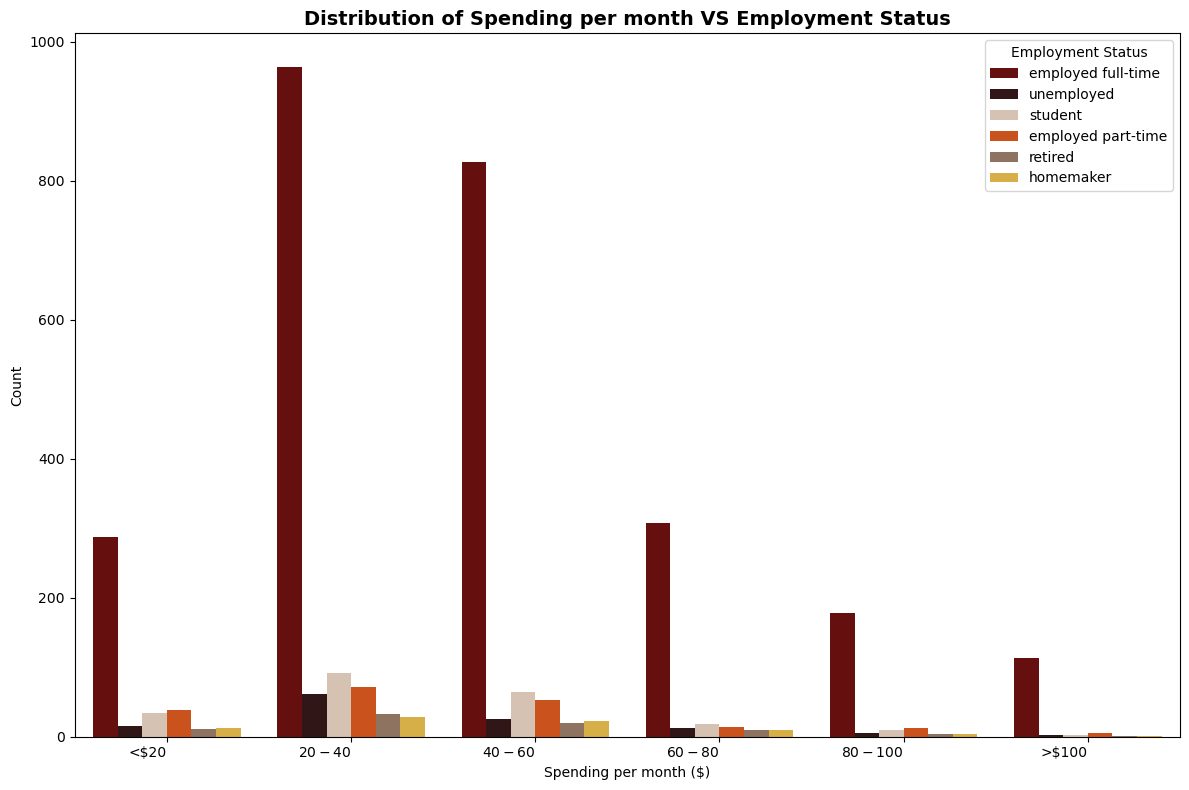

In [26]:
# Define the custom order of spending per month categories
spending_order = ['<$20','$20-$40', '$40-$60', '$60-$80', '$80-$100', '>$100']

#palette creation
colors=[ '#740001','#351113', '#dbc1ac','#e64700', '#967259','#eeba30']

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot a count plot using seaborn with custom order and colors
sns.countplot(x='spending per month', hue='Employment Status', data=data,order = spending_order,palette=colors)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='right')
    
# Set the title and labels
plt.title('Distribution of Spending per month VS Employment Status', fontsize=14, fontweight='bold')
plt.xlabel('Spending per month ($)')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


6.Political Affiliation

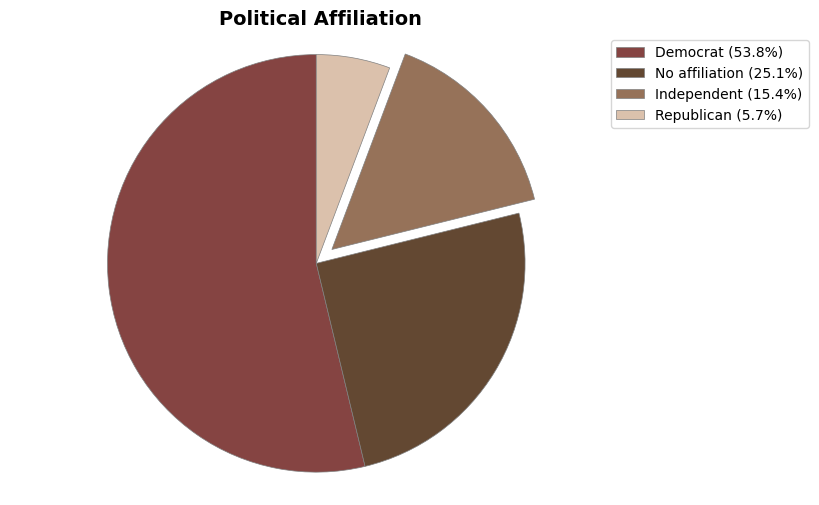

In [27]:
# Normalize gender labels by converting them to lowercase
data['Political Affiliation'] = data['Political Affiliation'].str.lower()

# Count the occurrences of each gender
ploitical_counts = data['Political Affiliation'].value_counts()

# Calculate percentages for each gender
percentages = [f'{count / ploitical_counts.sum() * 100:.1f}%' for count in ploitical_counts]

# Define color palette
colors=['#854442','#634832','#967259','#dbc1ac','#be9b7b','#ffcc99','#ff7373']

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the pie chart for plotical parties
explode = (0, 0, 0.1, 0)  # Explode slice
patches, _, _ = plt.pie(ploitical_counts, startangle=90, colors=colors, explode=explode, autopct='', labels=None)

# Add shadow
for patch in patches:
    patch.set_linewidth(0.5)
    patch.set_edgecolor('gray')

# Set title
plt.title('Political Affiliation', fontsize=14, fontweight='bold')

# Add legend with labels and percentages
legend_labels = [f'{politics.capitalize()} ({percentage})' for politics, percentage in zip(ploitical_counts.index, percentages)]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


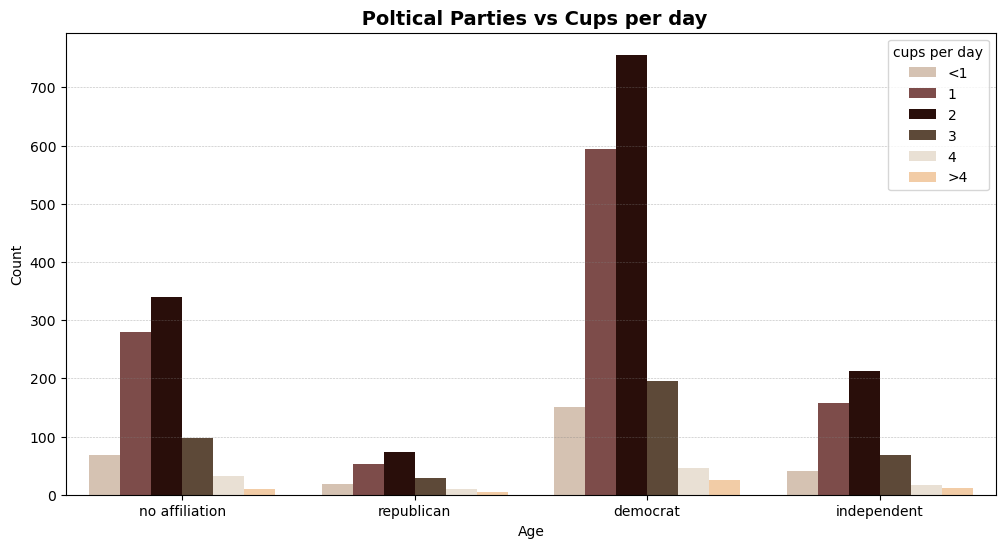

In [28]:
# Define the desired order for 'Age' and 'cups per day'
political_order = ['no affiliation', 'republican', 'democrat', 'independent']
cups_order = ['<1', '1', '2', '3', '4', '>4']

# Define a custom color palette for 'cups per day'
coffee_palette = {'1': '#854442', '4': '#ece0d1', '<1': '#dbc1ac', '>4': '#ffcc99', '3': '#634832', '2': '#2e0a05'}

# Create a figure and axes
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Political Affiliation', hue='cups per day', data=data, order=political_order, hue_order=cups_order, palette=coffee_palette)


# Add loosely dotted lines every 100 cups
for y in np.arange(100, ax.get_ylim()[1], 100):
    ax.axhline(y, linestyle=':', color='gray', linewidth=0.4)

plt.title(' Poltical Parties vs Cups per day',fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

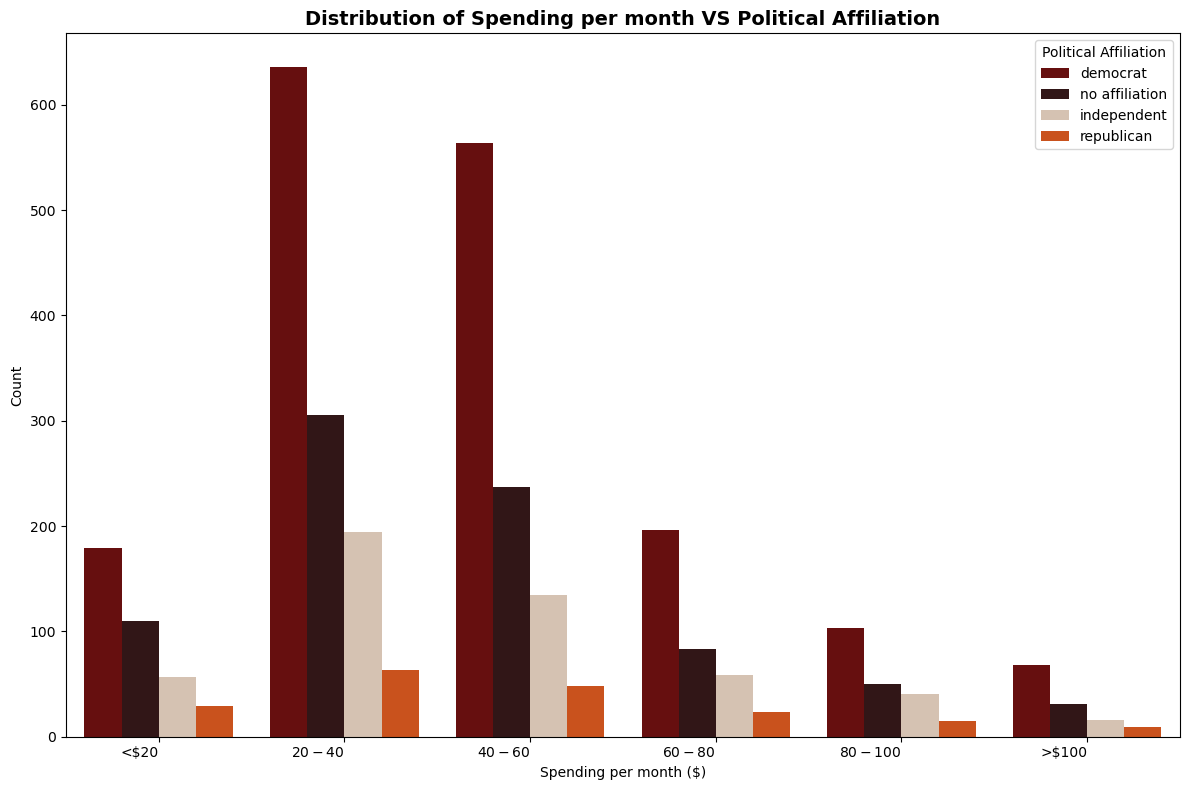

In [29]:
# Define the custom order of spending per month categories
spending_order = ['<$20','$20-$40', '$40-$60', '$60-$80', '$80-$100', '>$100']

#palette creation
colors=[ '#740001','#351113', '#dbc1ac','#e64700', '#967259','#eeba30']

# Set up the plot
plt.figure(figsize=(12, 8))

# Plot a count plot using seaborn with custom order and colors
sns.countplot(x='spending per month', hue='Political Affiliation', data=data,order = spending_order,palette=colors)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='right')
    
# Set the title and labels
plt.title('Distribution of Spending per month VS Political Affiliation', fontsize=14, fontweight='bold')
plt.xlabel('Spending per month ($)')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


# Psychographics

# Coffee Expertise

<AxesSubplot:xlabel='Percentage of Responses'>

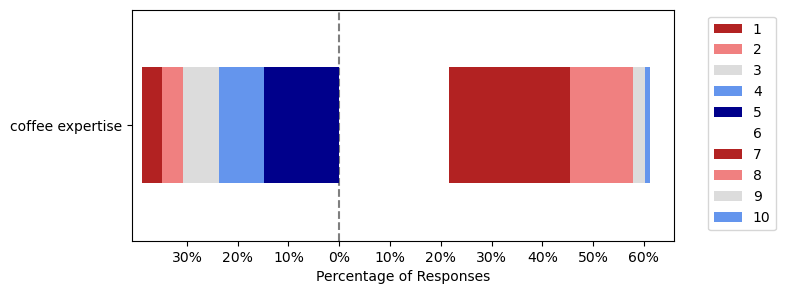

In [30]:
#Coffee Expertise
# Define the Likert scale
coffee_expertise_scale = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Plot the Likert chart as a stacked bar chart
plot_likert.plot_likert(data['coffee expertise'], coffee_expertise_scale,figsize=(7, 3), plot_percentage=True)

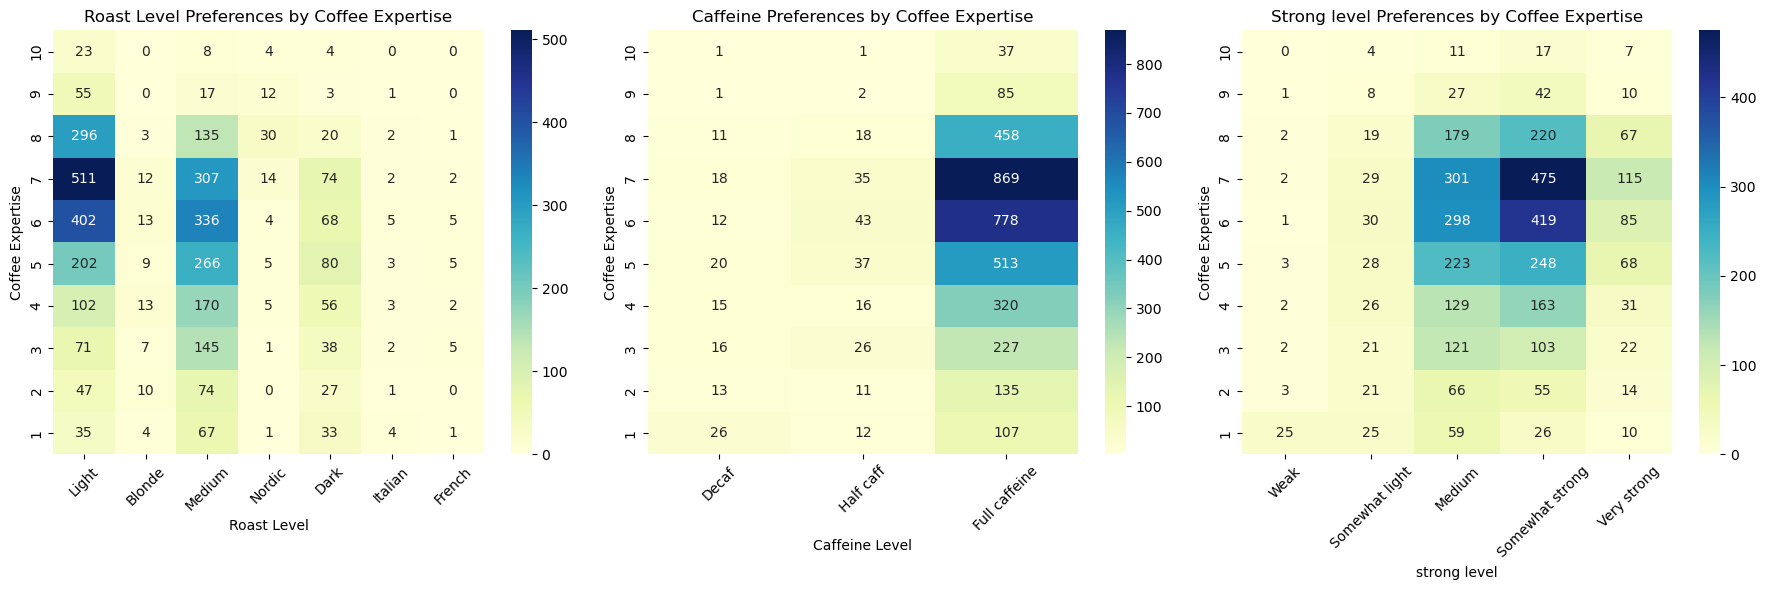

In [31]:

# Define the preference categories and their order
roast_levels = ['Light', 'Blonde', 'Medium', 'Nordic', 'Dark', 'Italian', 'French']
strengths = ['Weak', 'Somewhat light', 'Medium', 'Somewhat strong', 'Very strong']
caffeine_preferences = ['Decaf', 'Half caff', 'Full caffeine']

# Define the desired order for coffee expertise
coffee_expertise_order = ['10', '9', '8', '7', '6', '5', '4', '3', '2', '1']

# Convert the 'coffee expertise' column to an ordered categorical variable with the specified order
data['coffee expertise'] = data['coffee expertise'].astype(pd.CategoricalDtype(categories=coffee_expertise_order, ordered=True))

# Drop rows with missing values
data_cleaned = data.dropna(subset=['coffee expertise', 'roast level  ', ' caffeine in coffee', 'strong level '])

# Reorder the columns for the pivot table
columns_order = roast_levels + strengths + caffeine_preferences

# Define the size of the plot
plt.figure(figsize=(18, 6))

# Create heatmap for roast level
plt.subplot(1, 3, 1)
heatmap_data_roast = data_cleaned.pivot_table(index='coffee expertise', columns='roast level  ', aggfunc='size')[roast_levels]
sns.heatmap(heatmap_data_roast, cmap='YlGnBu', annot=True,fmt='d')
plt.title('Roast Level Preferences by Coffee Expertise')
plt.xlabel('Roast Level')
plt.ylabel('Coffee Expertise')
plt.xticks(rotation=45)

# Create heatmap for caffeine in coffee
plt.subplot(1, 3, 2)
heatmap_data_caffeine = data_cleaned.pivot_table(index='coffee expertise', columns=' caffeine in coffee', aggfunc='size')[caffeine_preferences]
sns.heatmap(heatmap_data_caffeine, cmap='YlGnBu', annot=True,fmt='d')
plt.title('Caffeine Preferences by Coffee Expertise')
plt.xlabel('Caffeine Level')
plt.ylabel('Coffee Expertise')
plt.xticks(rotation=45)

# Create heatmap for strength level
plt.subplot(1, 3, 3)
heatmap_data_strong = data_cleaned.pivot_table(index='coffee expertise', columns='strong level ', aggfunc='size')[strengths]
sns.heatmap(heatmap_data_strong, cmap='YlGnBu', annot=True,fmt='d')
plt.title('Strong level Preferences by Coffee Expertise')
plt.xlabel('strong level')
plt.ylabel('Coffee Expertise')
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


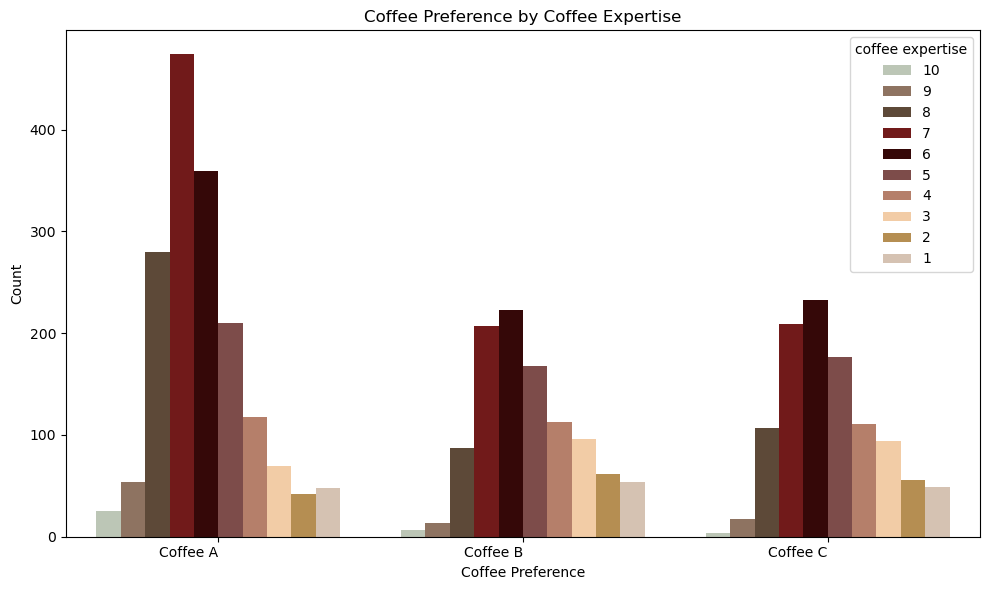

In [32]:

# Define the custom order of coffee preferences
coffee_preference_order = ['Coffee A', 'Coffee B', 'Coffee C']

# Define the custom color palette
colors = ['#bbc9b3','#967259','#634832','#7f0c0c','#3c0101','#854442','#c2795d','#ffcc99','#c69241','#dbc1ac']

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot a count plot using seaborn
sns.countplot(x='coffee a vs b vs c', hue='coffee expertise', data=data, order=coffee_preference_order, palette=colors)

# Set the title and labels
plt.title('Coffee Preference by Coffee Expertise')
plt.xlabel('Coffee Preference')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


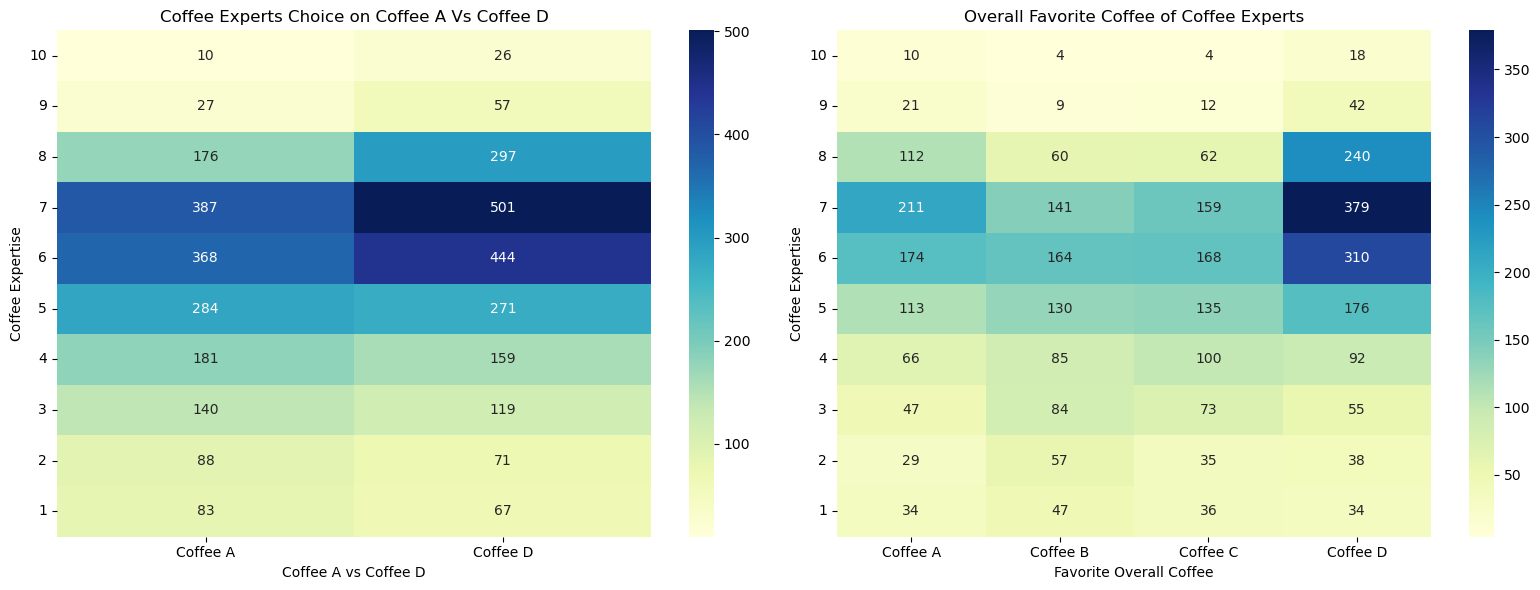

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to create a cross-tabulation between 'coffee expertise' and 'Coffee A vs Coffee D'
heatmap_data_1 = data.groupby(['coffee expertise', 'Coffee A vs Coffee D']).size().unstack(fill_value=0)

# Pivot the data to create a cross-tabulation between 'coffee expertise' and 'favorite overall coffee'
heatmap_data_2 = data.groupby(['coffee expertise', 'favorite overall coffee']).size().unstack(fill_value=0)

# Set up the plot with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first heatmap
sns.heatmap(heatmap_data_1, cmap='YlGnBu', annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Coffee Experts Choice on Coffee A Vs Coffee D')
axes[0].set_xlabel('Coffee A vs Coffee D')
axes[0].set_ylabel('Coffee Expertise')
axes[0].tick_params(rotation=0)

# Plot the second heatmap
sns.heatmap(heatmap_data_2, cmap='YlGnBu', annot=True, fmt='d', ax=axes[1])
axes[1].set_title('Overall Favorite Coffee of Coffee Experts')
axes[1].set_xlabel('Favorite Overall Coffee')
axes[1].set_ylabel('Coffee Expertise')
axes[1].tick_params(rotation=0)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


2.Reasons for drinking Coffee

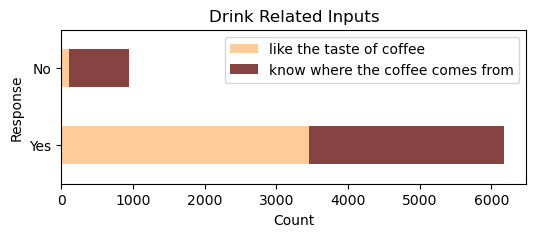

In [34]:
# Data
like_taste_counts = {'Yes': 3460, 'No': 103}
know_from_where_counts = {'Yes': 2720, 'No': 839}

# Create a DataFrame
df_YN = pd.DataFrame({'like the taste of coffee': like_taste_counts, 'know where the coffee comes from': know_from_where_counts})

# Plot the stacked horizontal bar plot
ax = df_YN.plot(kind='barh', stacked=True, figsize=(6, 2), color=['#ffcc99', '#854442'])

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Response')
ax.set_title('Drink Related Inputs')

# Show the plot
plt.show()


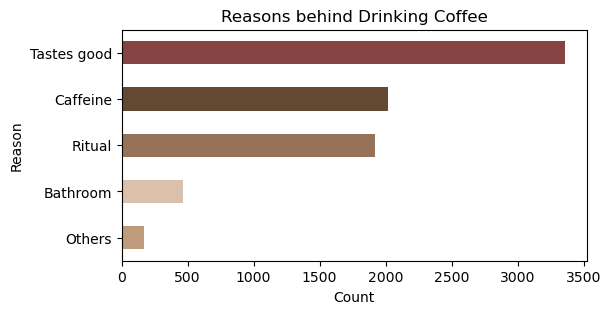

In [35]:
drink_reason = ['drink coffee (It tastes good)',
       'drink coffee (I need the caffeine)',
       'drink coffee (I need the ritual)', 'drink coffee ( bathroom)',
       'drink coffee(Other)']

# Count the number of 'True' values in each column
drink_counts = data[drink_reason].sum()

# Map column names to labels
label_map = {
    'drink coffee (It tastes good)': 'Tastes good',
    'drink coffee (I need the caffeine)': 'Caffeine',
    'drink coffee (I need the ritual)': 'Ritual',
    'drink coffee ( bathroom)': 'Bathroom',
    'drink coffee(Other)': 'Others'
}

# Rename columns using label_map
drink_counts.rename(index=label_map, inplace=True)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(6, 3))
drink_counts.sort_values().plot(kind='barh', color=['#be9b7b','#dbc1ac','#967259','#634832','#854442' ], ax=ax)

# Add labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Reason')
ax.set_title('Reasons behind Drinking Coffee')

# Display the chart
plt.show()



# Behavioral

# 1. Coffee Consumption

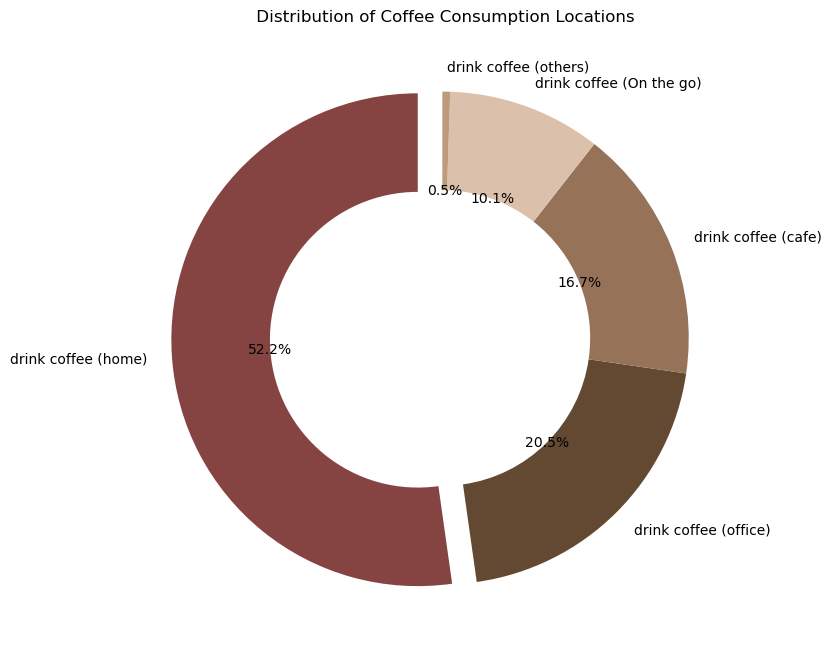

In [36]:
# Assuming columns are boolean (True/False) indicating whether individuals drink coffee at each location
drink_columns = ['drink coffee (home)', 'drink coffee (office)',
                  'drink coffee (cafe)', 'drink coffee (On the go)','drink coffee (others)']

# Count the number of 'True' values in each column
drink_counts = data[drink_columns].sum()

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Colors for each slice
colors = ['#854442','#634832','#967259','#dbc1ac','#be9b7b']

# Explode the slice with the highest count
explode = (0.1, 0, 0, 0, 0)

# Create the pie chart
ax.pie(drink_counts, labels=drink_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, wedgeprops=dict(width=0.4))

# Draw a white circle in the center to create the donut effect
centre_circle = plt.Circle((0,0),0.3,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect to be equal so that the pie chart looks circular
ax.set_aspect('equal')

# Add a title
ax.set_title(' Distribution of Coffee Consumption Locations')

# Display the chart
plt.show()


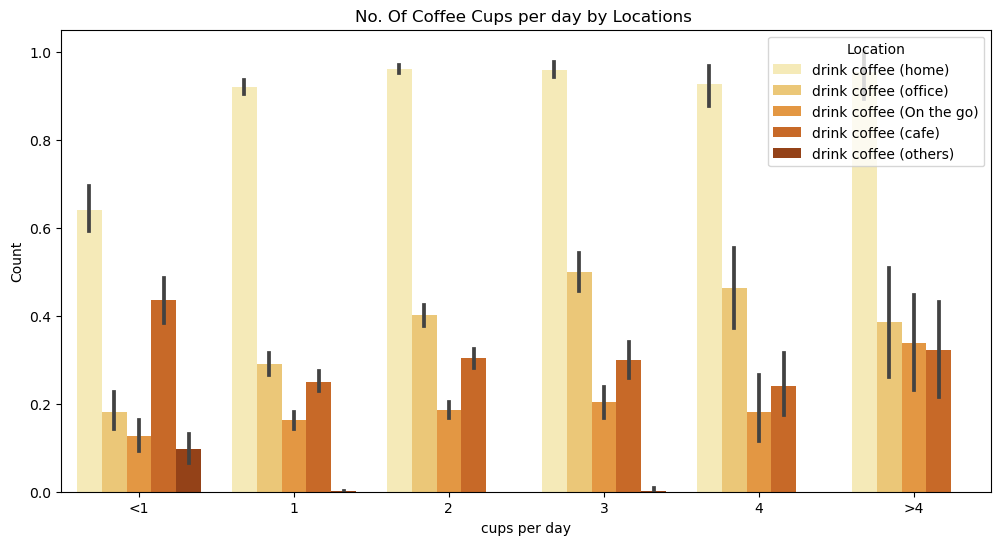

In [37]:
# Define the cup orders
cups_order = ['<1', '1', '2', '3', '4', '>4']

# Select the relevant columns for coffee consumption locations
coffee_locations = ['drink coffee (home)', 'drink coffee (office)', 'drink coffee (On the go)', 'drink coffee (cafe)', 'drink coffee (others)']
coffee_data = data[['cups per day'] + coffee_locations]

# Melt the DataFrame to make it suitable for plotting
melted_data = pd.melt(coffee_data, id_vars=['cups per day'], value_vars=coffee_locations, var_name='Location', value_name='Drink Coffee')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='cups per day', y='Drink Coffee', hue='Location', data=melted_data, palette='YlOrBr', order=cups_order)

plt.title('No. Of Coffee Cups per day by Locations ')
plt.xlabel('cups per day')
plt.ylabel('Count')
plt.show()


2. Brewing methods

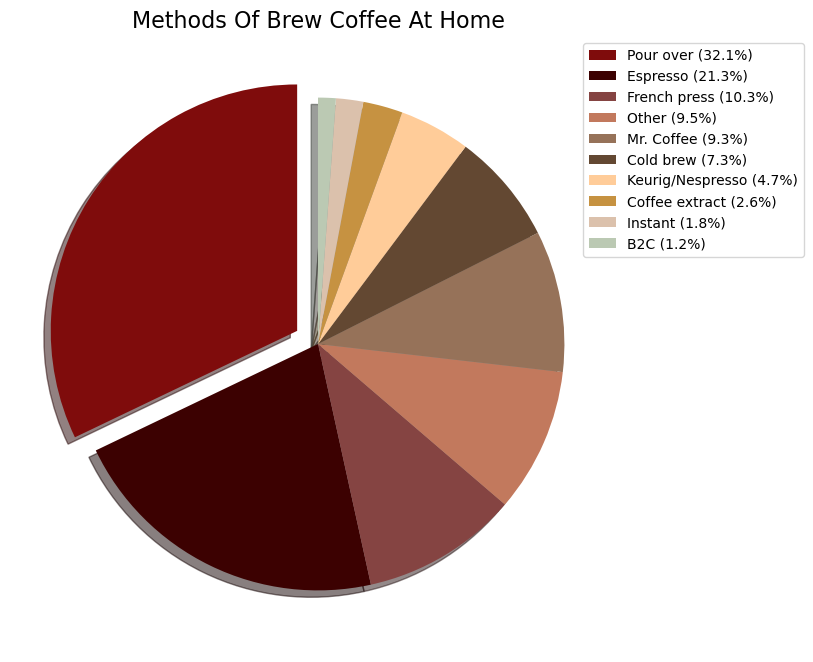

In [38]:
# Define column names exactly as they appear in the DataFrame
brew_coffee_home = ['brew coffee (Pour over)',
       'brew coffee (French press)', 'brew coffee (Espresso)',
       'brew coffee ( Mr. Coffee)', ' brew coffee ( Keurig/Nespresso)',
       'brew coffee (Instant coffee)', 'brew coffee (Bean-to-cup machine)',
       'brew coffee (Cold brew)', ' brew coffee  (Coffee extract )',
       ' brew coffee (Other)']

# Count the number of 'True' values in each column
brew_counts = data[brew_coffee_home].sum()

# Sort values from lowest to highest
brew_counts = brew_counts.sort_values(ascending=False)

label_map = {
    'brew coffee (Pour over)': 'Pour over',
    'brew coffee (French press)': 'French press',
    'brew coffee (Espresso)': 'Espresso',
    'brew coffee ( Mr. Coffee)': 'Mr. Coffee',
    ' brew coffee ( Keurig/Nespresso)': 'Keurig/Nespresso',
    'brew coffee (Instant coffee)': 'Instant',
    'brew coffee (Bean-to-cup machine)': 'B2C',
    'brew coffee (Cold brew)': 'Cold brew',
    ' brew coffee  (Coffee extract )': 'Coffee extract',
    ' brew coffee (Other)': 'Other'
}

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 8))

# Define custom colors
custom_colors = ['#7f0c0c','#3c0101','#854442','#c2795d','#967259','#634832','#ffcc99','#c69241','#dbc1ac','#bbc9b3']

# Explode the first slice (Pour over) to highlight it
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create the pie chart without percentages
wedges, _ = ax.pie(brew_counts, labels=None, startangle=90, explode=explode, colors=custom_colors, shadow=True, textprops=dict(color="w", fontsize=12))

# Set aspect to be equal so that the pie chart looks circular
ax.set_aspect('equal')

# Add a title
ax.set_title('Methods Of Brew Coffee At Home', fontsize=16)

# Use label map for labeling
labels = [label_map[label] for label in brew_counts.index]

# Create legend with custom labels on the upper left side
legend_labels = [f'{label} ({percent:.1f}%)' for label, percent in zip(labels, brew_counts / brew_counts.sum() * 100)]
plt.legend(wedges, legend_labels, loc='upper right',bbox_to_anchor=(1.3, 1))

# Display the chart
plt.show()

3. Purchasing Habits

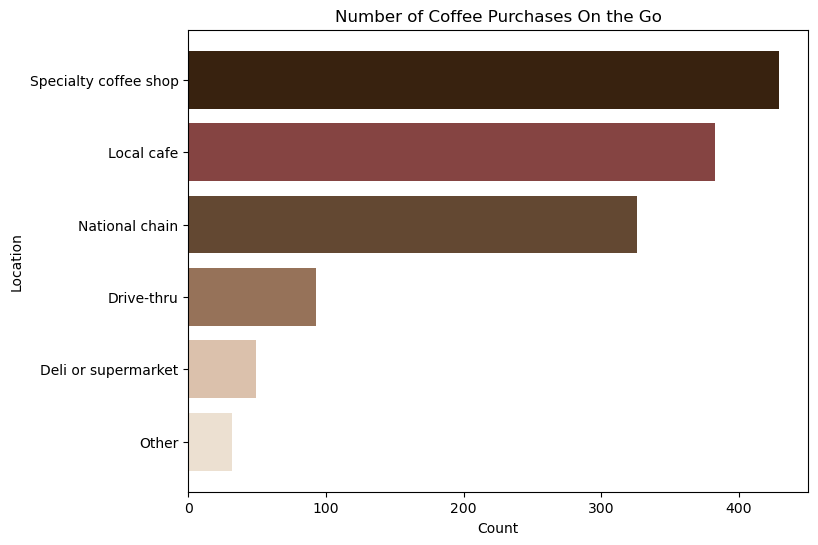

In [39]:
# Define the column names
on_the_go_columns = ['on the go purchase coffee (National chain )',
       'on the go purchase coffee (Local cafe)',
       'on the go purchase coffee (Drive-thru)',
       'on the go purchase coffee (Specialty coffee shop)',
       'on the go purchase coffee (Deli or supermarket)',
       'on the go purchase coffee (Other)']

# Define a dictionary for label mapping
label_map = {
    'on the go purchase coffee (National chain )': 'National chain',
    'on the go purchase coffee (Local cafe)': 'Local cafe',
    'on the go purchase coffee (Drive-thru)': 'Drive-thru',
    'on the go purchase coffee (Specialty coffee shop)': 'Specialty coffee shop',
    'on the go purchase coffee (Deli or supermarket)': 'Deli or supermarket',
    'on the go purchase coffee (Other)': 'Other'
}

# Count the number of purchases for each location
otg_counts = data[on_the_go_columns].sum()

# Sort values from lowest to highest
otg_counts = otg_counts.sort_values()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh([label_map[column] for column in otg_counts.index], otg_counts.values, color=['#ece0d1','#dbc1ac','#967259','#634832','#854442','#38220f'])

# Set the x-axis label
ax.set_xlabel('Count')

# Set the y-axis label
ax.set_ylabel('Location')

# Set the title
ax.set_title('Number of Coffee Purchases On the Go')

# Display the plot
plt.show()


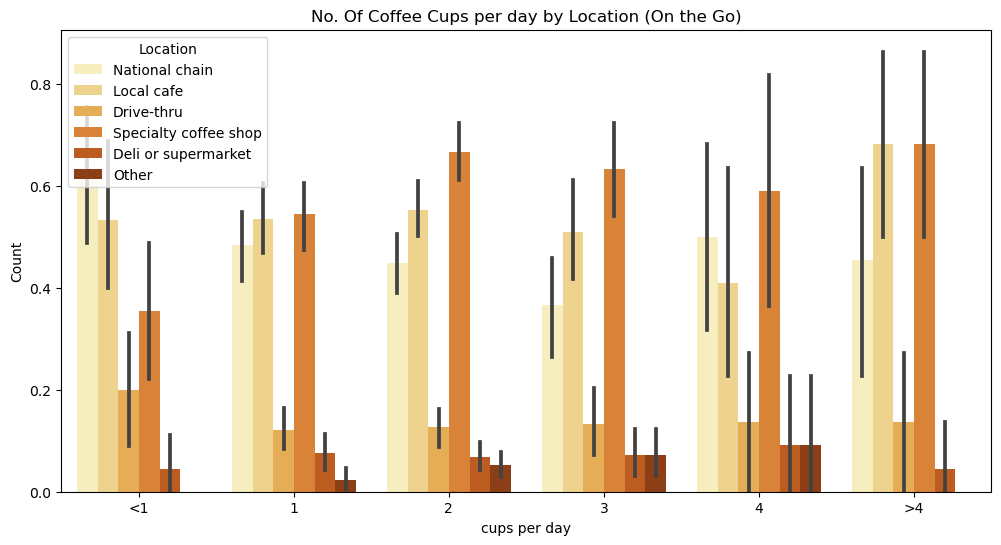

In [40]:
# Define the column names for on the go purchase coffee locations
on_the_go_columns = ['on the go purchase coffee (National chain )',
       'on the go purchase coffee (Local cafe)',
       'on the go purchase coffee (Drive-thru)',
       'on the go purchase coffee (Specialty coffee shop)',
       'on the go purchase coffee (Deli or supermarket)',
       'on the go purchase coffee (Other)']

# Define a dictionary for label mapping
label_map = {
    'on the go purchase coffee (National chain )': 'National chain',
    'on the go purchase coffee (Local cafe)': 'Local cafe',
    'on the go purchase coffee (Drive-thru)': 'Drive-thru',
    'on the go purchase coffee (Specialty coffee shop)': 'Specialty coffee shop',
    'on the go purchase coffee (Deli or supermarket)': 'Deli or supermarket',
    'on the go purchase coffee (Other)': 'Other'
}

# Define the cup orders
cups_order = ['<1', '1', '2', '3', '4', '>4']

# Select the relevant columns for on the go purchase coffee locations
on_the_go_data = data[['cups per day'] + on_the_go_columns]

# Melt the DataFrame to make it suitable for plotting
melted_data = pd.melt(on_the_go_data, id_vars=['cups per day'], value_vars=on_the_go_columns, var_name='Location', value_name='Drink Coffee')

# Map the label names using the dictionary
melted_data['Location'] = melted_data['Location'].map(label_map)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='cups per day', y='Drink Coffee', hue='Location', data=melted_data, palette='YlOrBr', order=cups_order)

plt.title('No. Of Coffee Cups per day by Location (On the Go)')
plt.xlabel('cups per day')
plt.ylabel('Count')
plt.show()


# 4.Product Offering Insights 

1. Coffee Beans

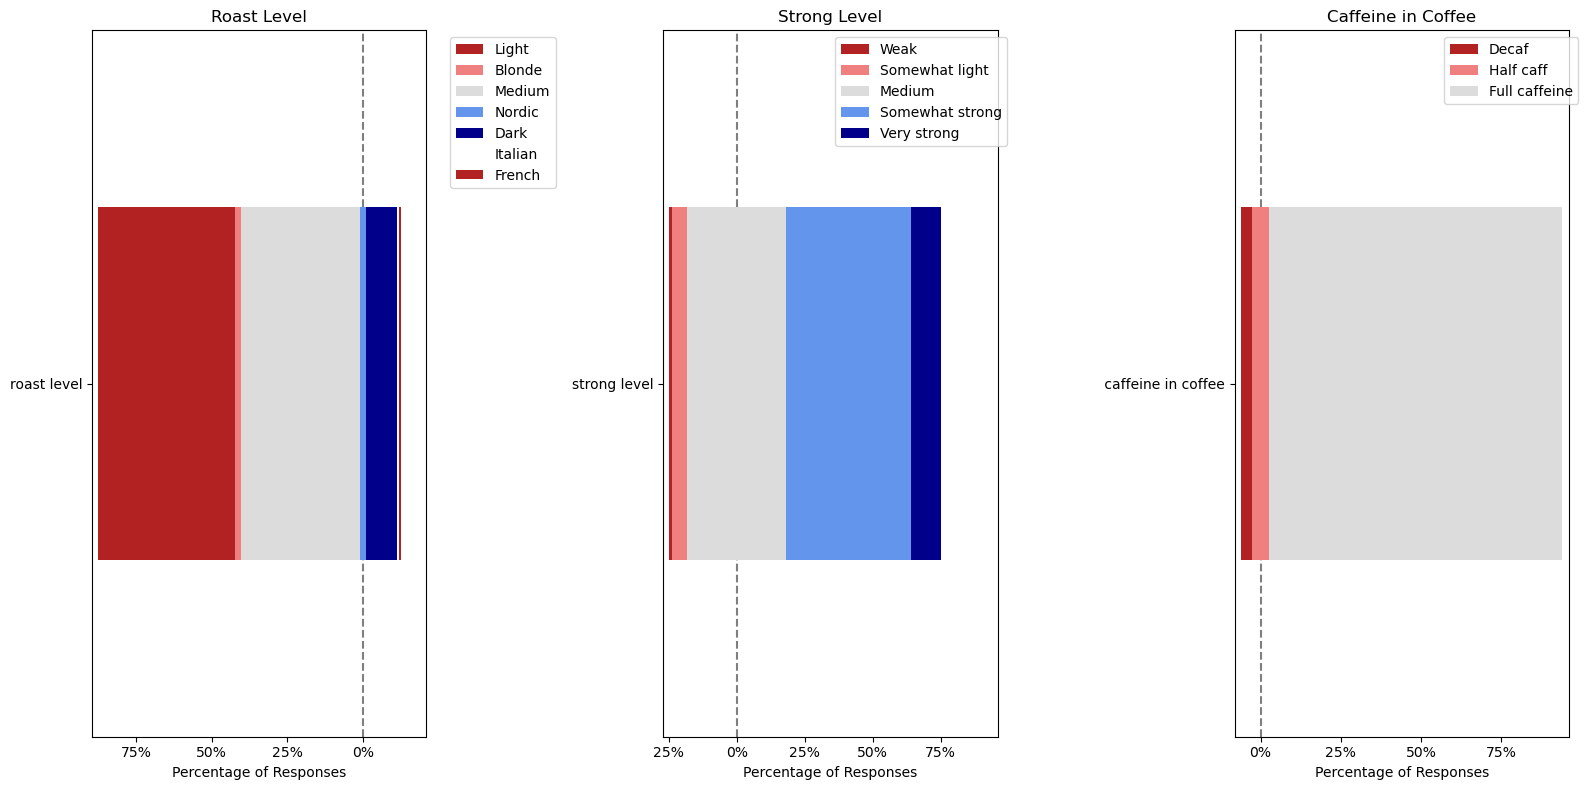

In [41]:

# Custom Likert scales
custom_roast_scale = ['Light', 'Blonde', 'Medium', 'Nordic', 'Dark', 'Italian', 'French']
custom_strong_scale = ['Weak', 'Somewhat light', 'Medium', 'Somewhat strong', 'Very strong']
custom_caffeine_scale = ['Decaf', 'Half caff', 'Full caffeine']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 8))

# Plot Likert scales
plot_likert.plot_likert(data['roast level  '], custom_roast_scale, plot_percentage=True, ax=axes[0])
axes[0].set_title('Roast Level')

plot_likert.plot_likert(data['strong level '], custom_strong_scale, plot_percentage=True, ax=axes[1])
axes[1].set_title('Strong Level')

plot_likert.plot_likert(data[' caffeine in coffee'], custom_caffeine_scale, plot_percentage=True, ax=axes[2])
axes[2].set_title('Caffeine in Coffee')

plt.tight_layout()
plt.show()


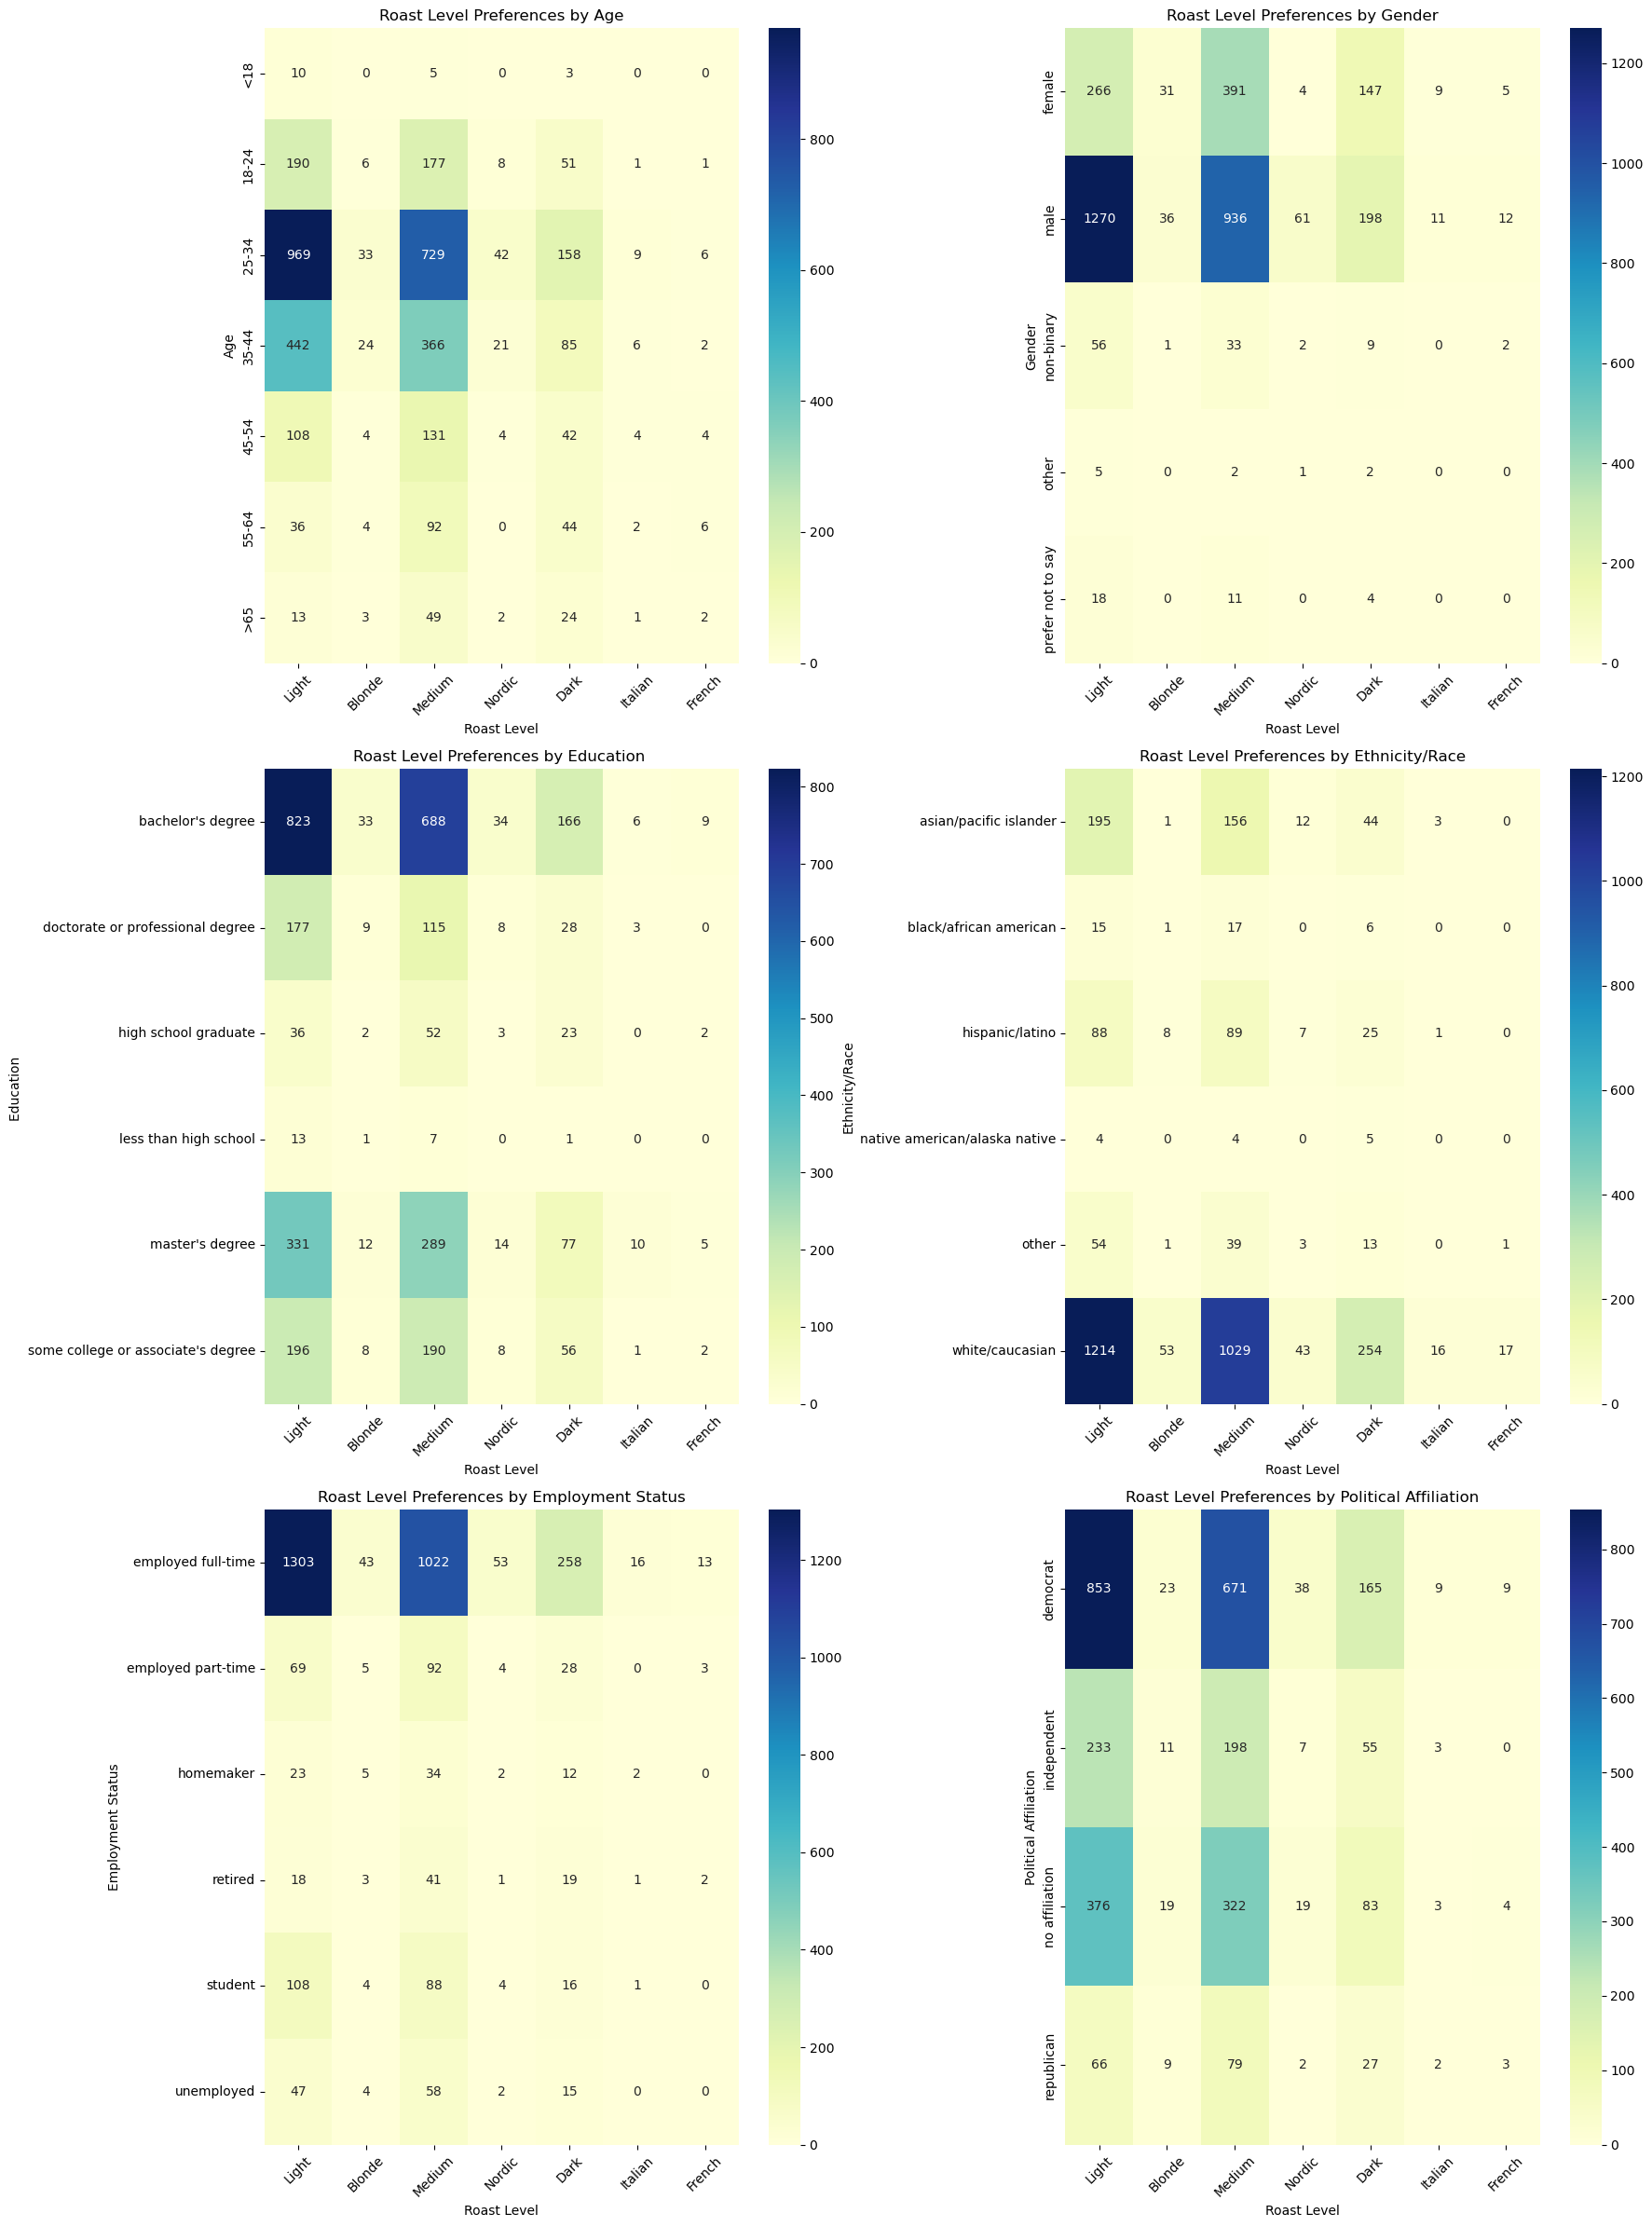

In [42]:
# Define the desired order for age categories
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '>65']

# Convert the 'Age' column to an ordered categorical variable with the specified order
data['Age'] = pd.Categorical(data['Age'], categories=age_order, ordered=True)

# Define the categories for heatmap
categories = ['Age', 'Gender', 'Education ', 'Ethnicity/Race', 'Employment Status', 'Political Affiliation']

# Define the size of the plot
plt.figure(figsize=(18, 24))

# Loop through each category and create a heatmap
for i, category in enumerate(categories, start=1):
    plt.subplot(3, 2, i)
    heatmap_data = data.pivot_table(index=category, columns='roast level  ', aggfunc='size', fill_value=0)[roast_levels]
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
    plt.title(f'Roast Level Preferences by {category}')
    plt.xlabel('Roast Level')
    plt.ylabel(category)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


2.Coffee Drinks 

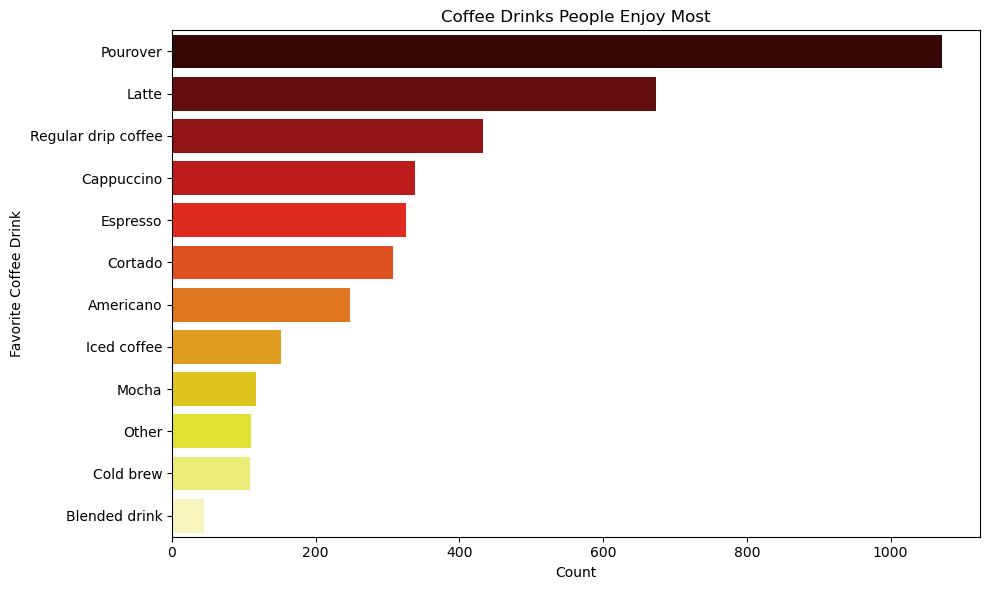

In [43]:


# Assuming data is your DataFrame containing the 'favorite coffee drink' column

# Set up the plot size
plt.figure(figsize=(10, 6))

# Plot the Likert scale chart using seaborn's countplot
sns.countplot(y=' favorite coffee drink', data=data, palette='hot', order=data[' favorite coffee drink'].value_counts().index)

# Set the title and labels
plt.title('Coffee Drinks People Enjoy Most')
plt.xlabel('Count')
plt.ylabel('Favorite Coffee Drink')

# Show the plot
plt.tight_layout()
plt.show()


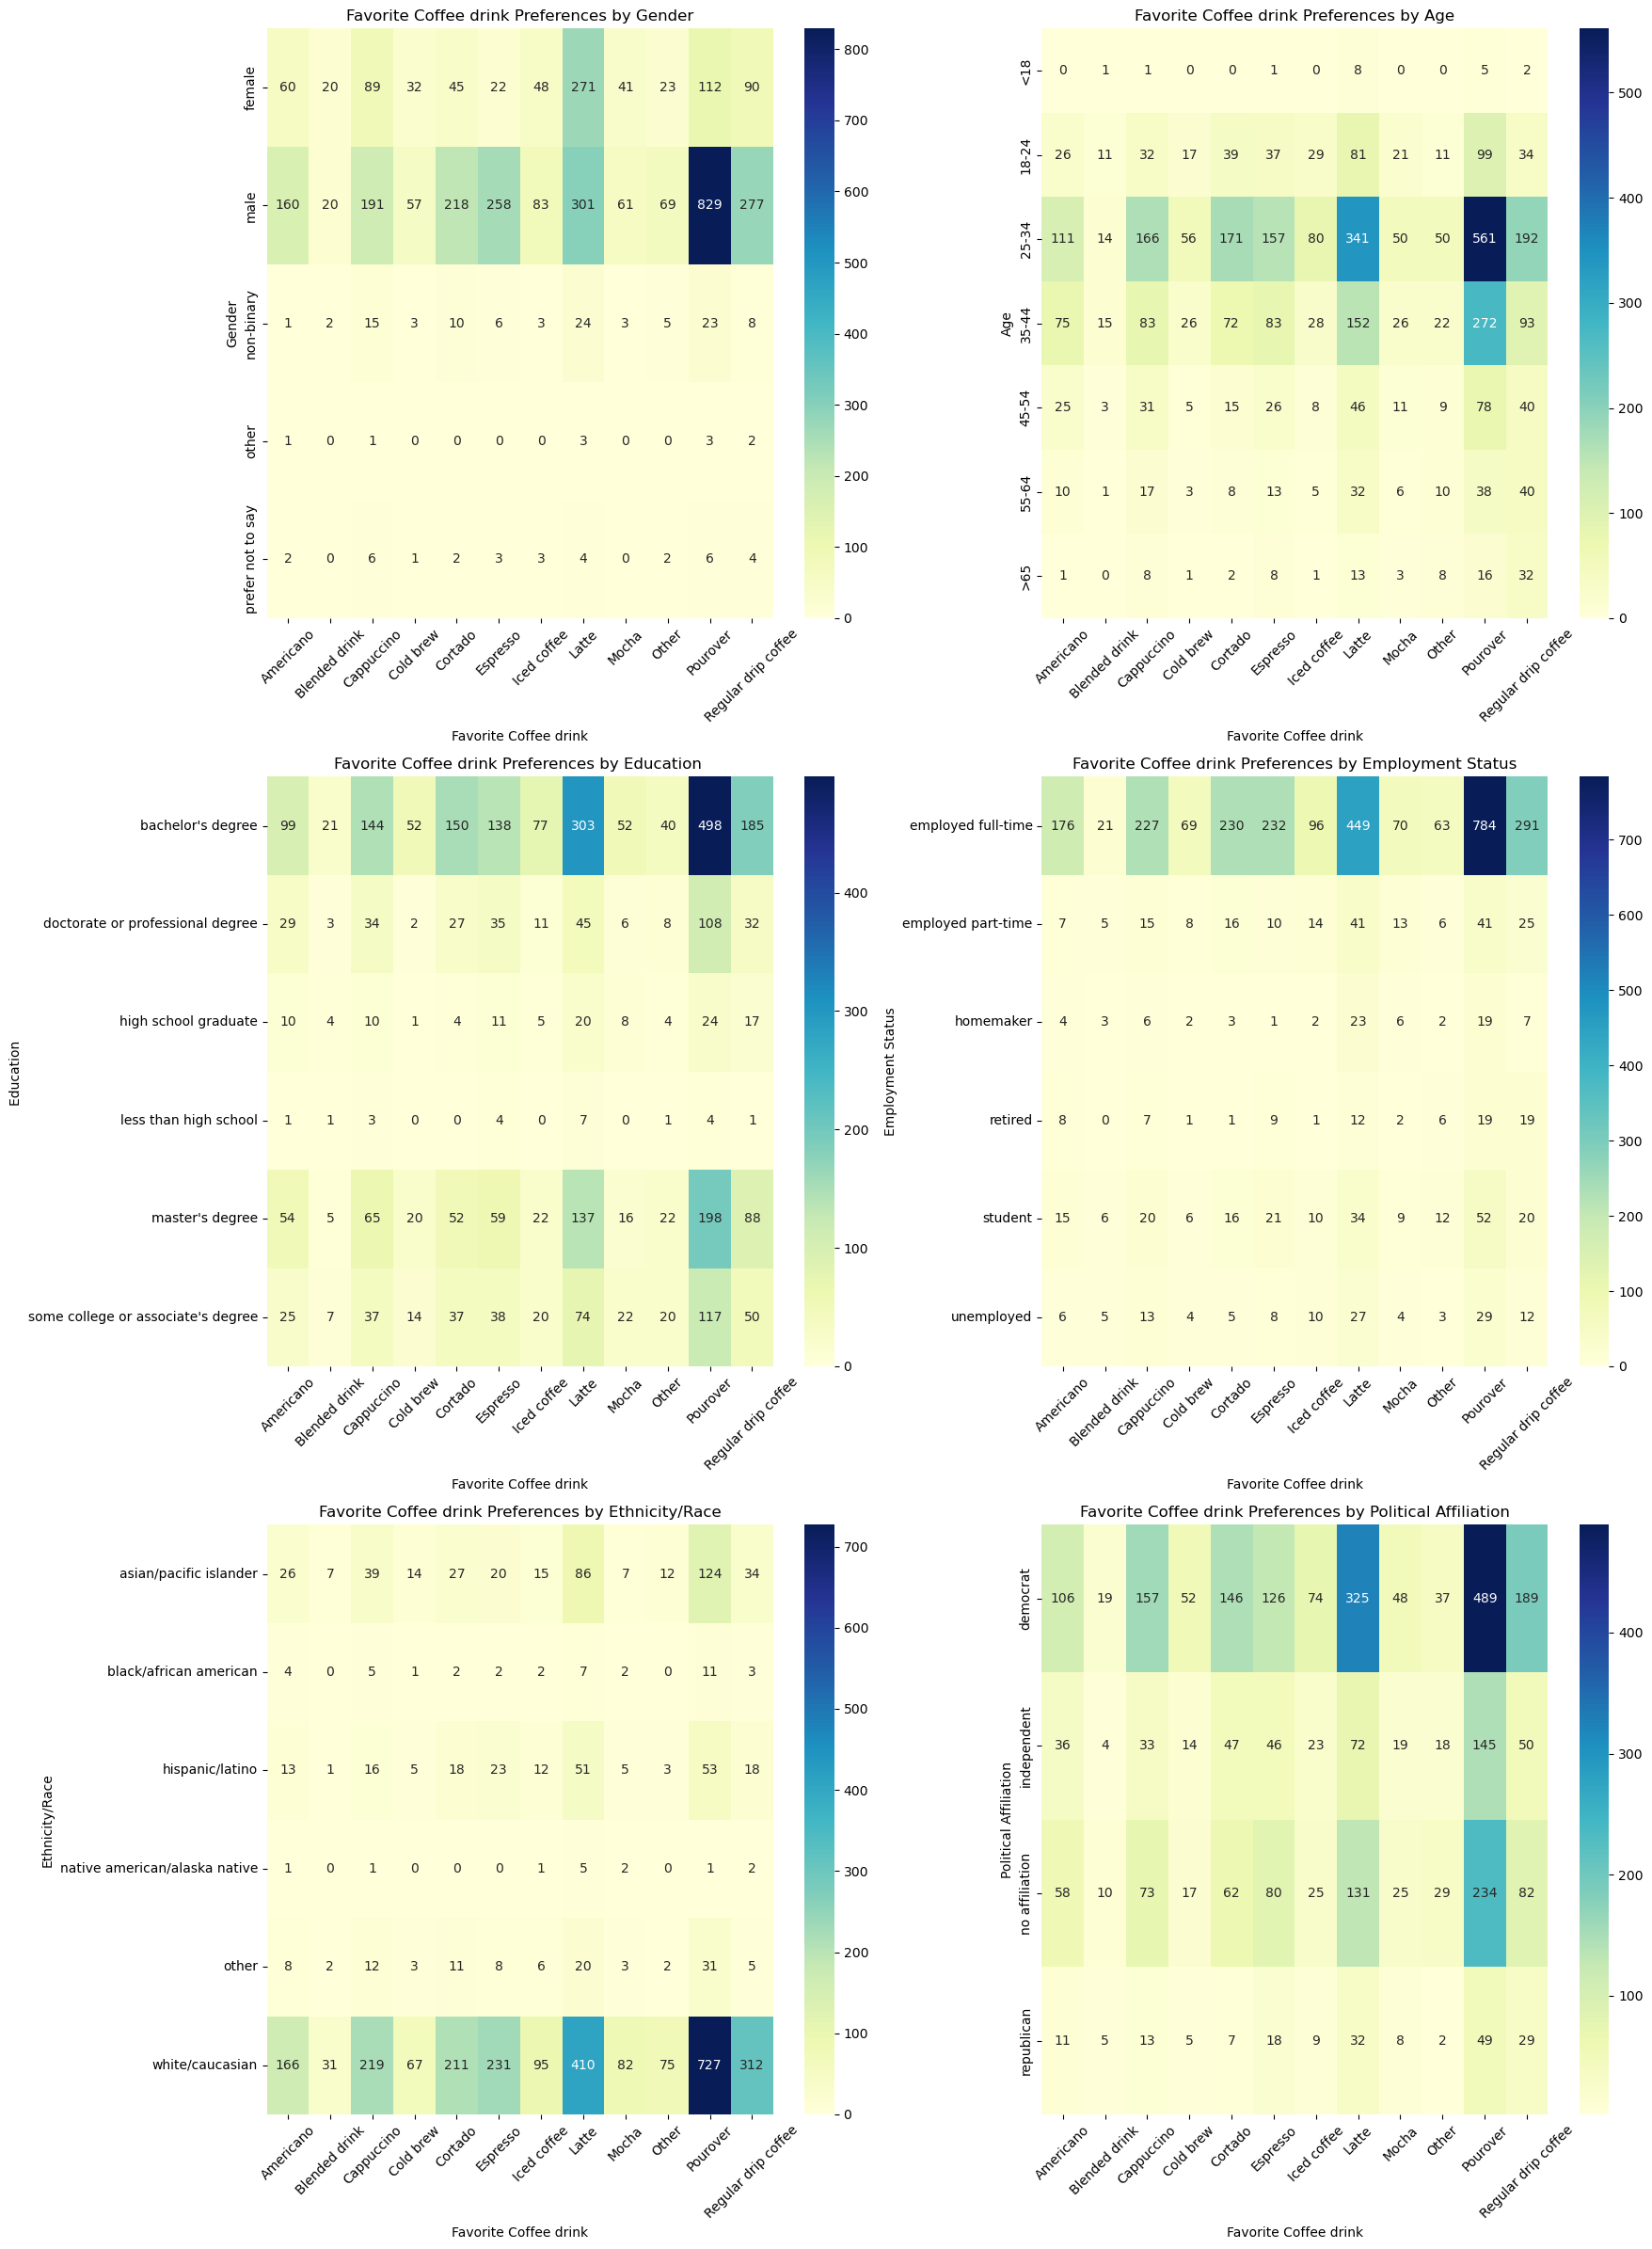

In [44]:

# Define the categorical variables and their favorite coffee drink
categorical_variables = ['Gender', 'Age', 'Education ', 'Employment Status', 'Ethnicity/Race', 'Political Affiliation']
favorite_coffee_drink = ' favorite coffee drink'  # Assuming this is the column name for favorite coffee drink

# Define the size of the plot
plt.figure(figsize=(18, 24))

# Loop through each category and create a heatmap
for i, category in enumerate(categorical_variables, start=1):
    plt.subplot(3, 2, i)
    heatmap_data = data.pivot_table(index=category, columns=favorite_coffee_drink, aggfunc='size', fill_value=0)
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
    plt.title(f'Favorite Coffee drink Preferences by {category}')
    plt.xlabel('Favorite Coffee drink')
    plt.ylabel(category)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


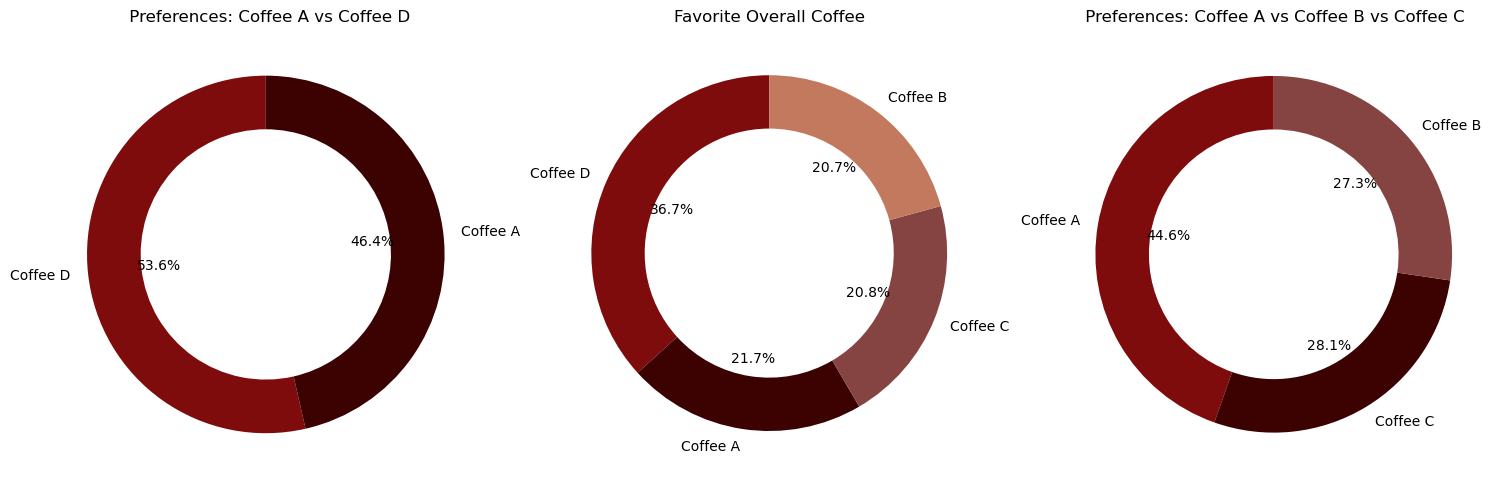

In [45]:
# Define the data for each chart
coffee_counts_AD = data['Coffee A vs Coffee D'].value_counts()
fav_coffee = data['favorite overall coffee'].value_counts()
coffee_counts_ABC = data['coffee a vs b vs c'].value_counts()

# Custom color palette
colors = ['#7f0c0c', '#3c0101', '#854442', '#c2795d']

# Create subplots for each donut chart
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot donut chart for 'Coffee A vs Coffee D'
axs[0].pie(coffee_counts_AD, labels=coffee_counts_AD.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=colors)
axs[0].set_title(' Preferences: Coffee A vs Coffee D')
axs[0].axis('equal')

# Plot donut chart for 'favorite overall coffee'
axs[1].pie(fav_coffee, labels=fav_coffee.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=colors)
axs[1].set_title('Favorite Overall Coffee')
axs[1].axis('equal')

# Plot donut chart for 'coffee a vs b vs c'
axs[2].pie(coffee_counts_ABC, labels=coffee_counts_ABC.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), colors=colors)
axs[2].set_title(' Preferences: Coffee A vs Coffee B vs Coffee C')
axs[2].axis('equal')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


3.Flavorings

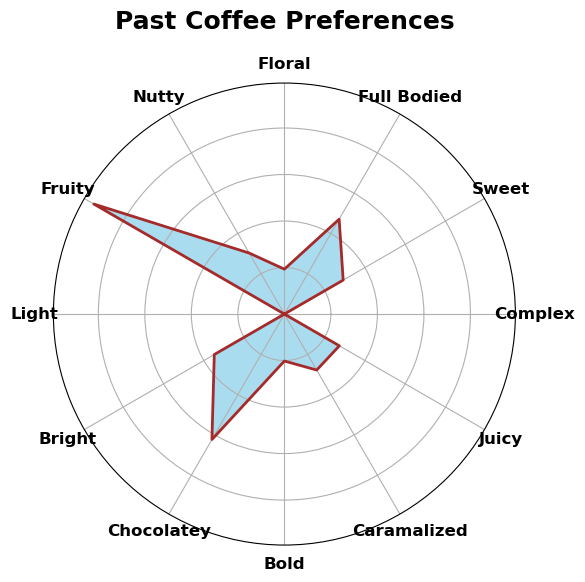

In [46]:


# Define the categories and their frequencies
categories = ['Complex', 'Sweet', 'Full Bodied', 'Floral', 'Nutty', 'Fruity', 
              'Light','Bright','Chocolatey', 'Bold','Caramalized', 'Juicy']
preferences = [data['Before coffee preference'].value_counts().get(pref, 0) for pref in categories]

# Number of categories
num_categories = len(categories)

# Create a radar chart
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Make the plot close to a circle
preferences += preferences[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Define colors for the filled area and the outline
fill_color = 'skyblue'
line_color = 'brown'

# Plot the filled area
ax.fill(angles, preferences, color=fill_color, alpha=0.7)

# Plot the outline
ax.plot(angles, preferences, color=line_color, linewidth=2)

# Add labels
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')

# Title
plt.title('Past Coffee Preferences', size=18, fontweight='bold', y=1.1)

plt.show()


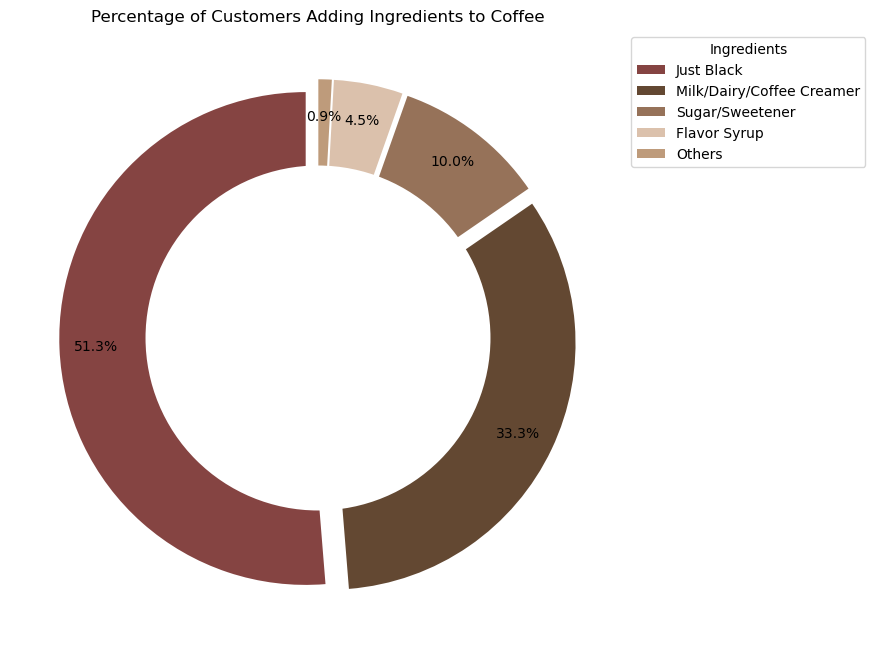

In [47]:
# Assuming columns are boolean (True/False) indicating whether individuals drink coffee at each location
add_to_coffee = [' add to coffee (No - just black)',
                 'add to coffee (Milk, dairy alternative, or coffee creamer)',
                 'add to coffee (Sugar or sweetener)', 'add to coffee(Flavor syrup)',
                 'add to coffee (Other)']

# Count the number of 'True' values in each column
additives_percentage = data[add_to_coffee].sum()

# Map column names to labels
label_map_coffee = {
    ' add to coffee (No - just black)': 'Just Black',
    'add to coffee (Milk, dairy alternative, or coffee creamer)': 'Milk/Dairy/Coffee Creamer',
    'add to coffee (Sugar or sweetener)': 'Sugar/Sweetener',
    'add to coffee(Flavor syrup)': 'Flavor Syrup',
    'add to coffee (Other)': 'Others'
}

# Rename columns using label_map
additives_percentage.rename(index=label_map_coffee, inplace=True)

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Colors for each slice
colors = ['#854442', '#634832', '#967259', '#dbc1ac', '#be9b7b']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(additives_percentage, colors=colors,
        autopct='%1.1f%%',startangle=90, pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Percentage of Customers Adding Ingredients to Coffee')

# Set legend with mapped labels and adjust position
plt.legend(label_map_coffee.values(), loc="upper right", title="Ingredients", bbox_to_anchor=(1.4, 1))

# Displaying Chart
plt.show()


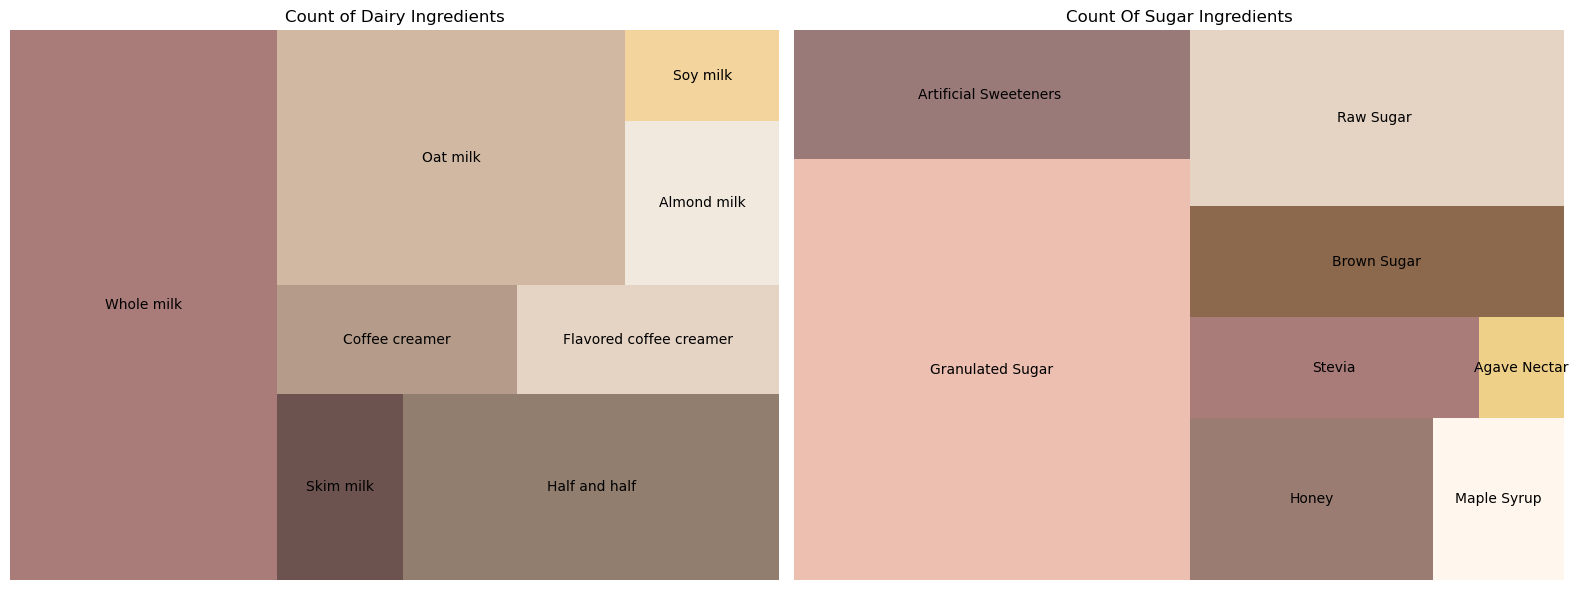

In [48]:
# Define Add_Dairy and Add_Sugar
Add_Dairy = ['add dairy (Whole milk)', 'add dairy  (Skim milk)', 'add dairy (Half and half)',
             'add dairy (Coffee creamer)', 'add dairy (Flavored coffee creamer)',
             'add dairy (Oat milk)', 'add dairy (Almond milk)', 'add dairy (Soy milk)']

Add_Sugar = ['sugar or sweetener add (Granulated Sugar)', 'sugar or sweetener add (Artificial Sweeteners )',
             'sugar or sweetener add(Honey)', 'sugar or sweetener add (Maple Syrup)',
             'sugar or sweetener add (Stevia)', 'sugar or sweetener add (Agave Nectar)',
             'sugar or sweetener add(Brown Sugar)', 'sugar or sweetener add(Raw Sugar )']

# Level map the names and extract only the inside part of the bracket
level_mapped_dairy = [name.split('(')[-1][:-1] for name in Add_Dairy]
level_mapped_sugar = [name.split('(')[-1][:-1] for name in Add_Sugar]

# Calculate counts of true values for each category in Add_Dairy and Add_Sugar
add_dairy_counts = data[Add_Dairy].sum()
add_sugar_counts = data[Add_Sugar].sum()

# Define color palettes for Add Dairy and Add Sugar
color_palette_dairy = ['#854442', '#2e0a05', '#634832', '#967259', '#dbc1ac', '#be9b7b', '#ece0d1', '#edc373']
color_palette_sugar = ['#e5a590', '#704041', '#6f4436', '#fff4e6', '#854442', '#e7bd57', '#5c2a00', '#dbc1ac']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Treemap for Add Dairy
axes[0].set_title('Count of Dairy Ingredients')
squarify.plot(sizes=add_dairy_counts, label=level_mapped_dairy, alpha=0.7, color=color_palette_dairy, ax=axes[0])
axes[0].axis('off')

# Treemap for Add Sugar
axes[1].set_title('Count Of Sugar Ingredients')
squarify.plot(sizes=add_sugar_counts, label=level_mapped_sugar, alpha=0.7, color=color_palette_sugar, ax=axes[1])
axes[1].axis('off')

plt.tight_layout()
plt.show()


# Pricing Strategy

1. Value perception and spending

In [49]:
data['getting good value ( buy from café)'].value_counts()

Yes    2048
No     1452
Name: getting good value ( buy from café), dtype: int64

In [50]:
data['drink coffee (cafe)'].value_counts()

False    2765
True     1151
Name: drink coffee (cafe), dtype: int64

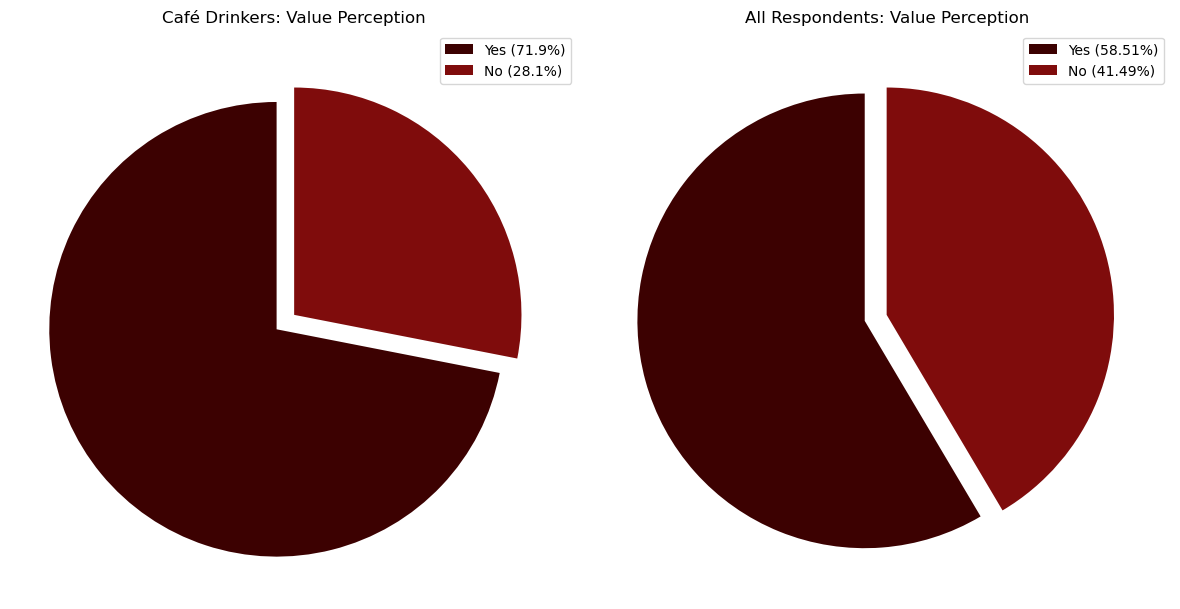

In [51]:
# Drop rows with NaN values in the 'drink coffee (cafe)' column
data_filtered = data.dropna(subset=['drink coffee (cafe)'])

# Filter the dataframe to include only rows where 'drink coffee (cafe)' is True
cafe_drinkers = data_filtered[data_filtered['drink coffee (cafe)']]

# Define the column 'getting good value ( buy from café)'
value_column = 'getting good value ( buy from café)'

# Count the occurrences of each response
value_counts_cafe = cafe_drinkers[value_column].value_counts()

# Calculate percentages
percentages_cafe = (value_counts_cafe / value_counts_cafe.sum() * 100).round(1)

# Define explode
explode = (0.1, 0)

# Create the first pie chart for café drinkers
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for café drinkers
axs[0].pie(value_counts_cafe, labels=None, autopct='', startangle=90, colors=[ '#3c0101','#7f0c0c'], explode=explode)
axs[0].set_title('Café Drinkers: Value Perception')

# Format legend labels with percentages
legend_labels_cafe = [f'{label} ({percent}%)' for label, percent in zip(value_counts_cafe.index, percentages_cafe)]
axs[0].legend(legend_labels_cafe, loc='best', fontsize=10)

# Count the occurrences of each response for all respondents
value_counts_all = data['getting good value ( buy from café)'].value_counts()

# Define explode
explode = (0.1, 0)  # Explode the first slice (Yes)

# Plot the second pie chart for all respondents
wedges, _, autotexts = axs[1].pie(value_counts_all, labels=None, startangle=90, explode=explode, colors=['#3c0101','#7f0c0c'], autopct='%1.1f%%')

# Format legend labels with percentages (for the second chart)
legend_labels_all = [f'{label} ({percent:.2f}%)' for label, percent in zip(value_counts_all.index, value_counts_all / value_counts_all.sum() * 100)]
axs[1].legend(wedges, legend_labels_all, loc='best', fontsize=10)

# Hide percentages from the top of the pie
for autotext in autotexts:
    autotext.set_visible(False)

axs[1].set_title('All Respondents: Value Perception')

# Show the plots
plt.tight_layout()
plt.show()


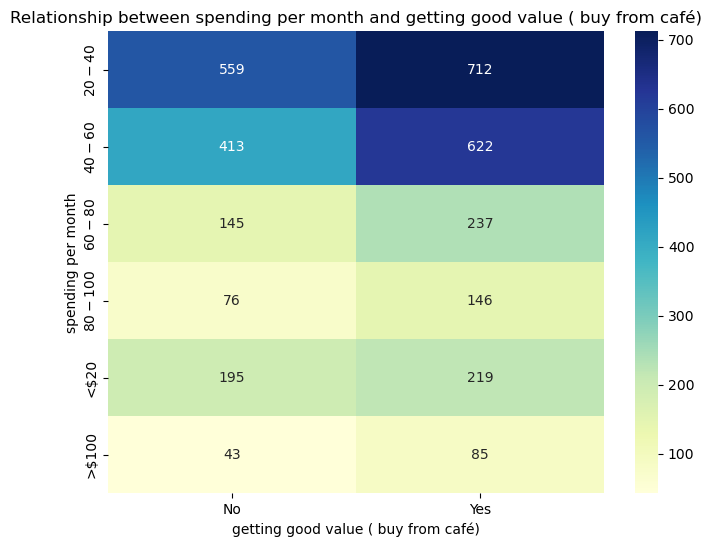

In [52]:
# Filter out rows with missing values in 'Spending per month' and 'Getting good value (buy from café)'
data_filtered = data.dropna(subset=['spending per month', 'getting good value ( buy from café)'])

# Define the columns
spending_column = 'spending per month'
value_column = 'getting good value ( buy from café)'

# Create a cross-tabulation
cross_tab = pd.crosstab(data_filtered[spending_column], data_filtered[value_column])

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title(f'Relationship between {spending_column} and {value_column}')
plt.xlabel(value_column)
plt.ylabel(spending_column)
plt.xticks(rotation=0)
plt.show()


2.Price Sensitivity

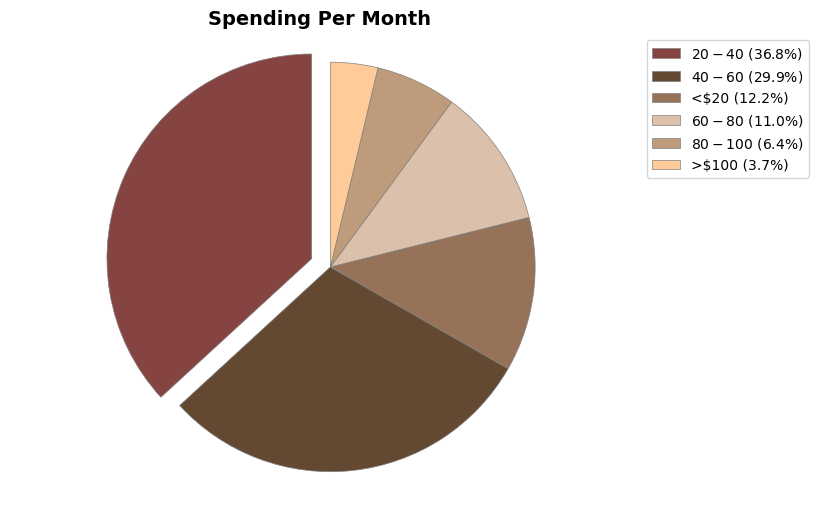

In [53]:
# Normalize gender labels by converting them to lowercase
data['spending per month'] = data['spending per month'].str.lower()

# Count the occurrences of each gender
Spending_counts = data['spending per month'].value_counts()

# Calculate percentages for each gender
percentages = [f'{count / Spending_counts.sum() * 100:.1f}%' for count in Spending_counts]

# Define color palette
colors=['#854442','#634832','#967259','#dbc1ac','#be9b7b','#ffcc99','#ff7373']

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the pie chart for education
explode = (0.1, 0, 0, 0, 0,0)  # Explode slice
patches, _, _ = plt.pie(Spending_counts, startangle=90, colors=colors, explode=explode, autopct='', labels=None)

# Add shadow
for patch in patches:
    patch.set_linewidth(0.5)
    patch.set_edgecolor('gray')

# Set title
plt.title('Spending Per Month', fontsize=14, fontweight='bold')

# Add legend with labels and percentages
legend_labels = [f'{spending.capitalize()} ({percentage})' for spending, percentage in zip(Spending_counts.index, percentages)]
plt.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


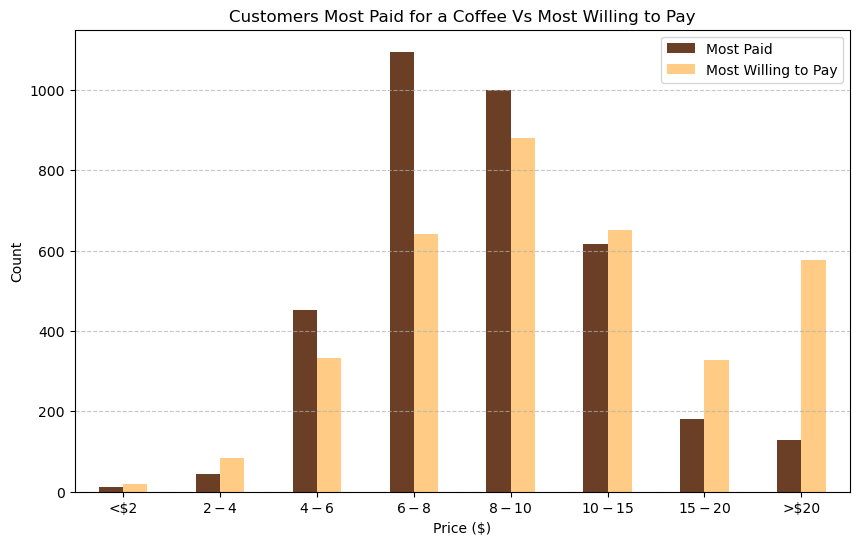

In [54]:
# Define the order for the categories
order = ['<$2', '$2-$4', '$4-$6', '$6-$8', '$8-$10', '$10-$15', '$15-$20', '>$20']

# Define the label map
label_map = {
    'Less than $2': '<$2',
    '$2-$4': '$2-$4',
    '$4-$6': '$4-$6',
    '$6-$8': '$6-$8',
    '$8-$10': '$8-$10',
    '$10-$15': '$10-$15',
    '$15-$20': '$15-$20',
    'More than $20': '>$20'
}

# Apply label mapping to the 'most paid for a coffee' column
data['most paid for a coffee'] = data['most paid for a coffee'].map(label_map)

# Apply label mapping to the 'most willing to pay' column
data[' most willing to pay'] = data[' most willing to pay'].map(label_map)

# Count the occurrences of each value in the 'most paid for a coffee' column
most_paid_counts = data['most paid for a coffee'].value_counts()

# Count the occurrences of each value in the 'most willing to pay' column
most_willing_to_pay_counts = data[' most willing to pay'].value_counts()

# Combine the counts into a single DataFrame
combined_counts = pd.DataFrame({'Most Paid': most_paid_counts, 'Most Willing to Pay': most_willing_to_pay_counts})

# Reorder the DataFrame according to the defined order
combined_counts = combined_counts.reindex(order)

# Define colors
colors = ['#6b3e26','#ffcb85']

# Plot the bar plot with specified colors
combined_counts.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Customers Most Paid for a Coffee Vs Most Willing to Pay')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


3. Blind taste

In [55]:
# Your data
data_new = {
    'Coffee A - Bitterness': [25.882043, 45.313323, 19.325961, 7.767246, 1.711427],
    'Coffee A - Acidity': [2.937285, 9.711564, 26.382641, 42.868484, 18.100026],
    'Coffee A - Personal Preference': [8.07601, 18.712061, 23.911322, 32.647136, 16.653471],
    'Coffee B - Bitterness': [6.931217, 22.328042, 38.730159, 26.507937, 5.502646],
    'Coffee B - Acidity': [20.175206, 45.208389, 27.316167, 6.663127, 0.637112],
    'Coffee B - Personal Preference': [7.845216, 24.092234, 32.573549, 24.330771, 11.15823],
    'Coffee C - Bitterness': [5.977683, 22.476089, 36.07864, 29.303932, 6.163656],
    'Coffee C - Acidity': [17.435351, 40.655825, 30.845108, 9.917355, 1.146361],
    'Coffee C - Personal Preference': [8.842273, 23.048327, 31.943707, 25.11949, 11.046203],
    'Coffee D - Bitterness': [32.041412, 36.049907, 18.715158, 9.981418, 3.212105],
    'Coffee D - Acidity': [2.841965, 7.596282, 19.043825, 41.938911, 28.579017],
    'Coffee D - Personal Preference': [16.312434, 14.532412, 14.66525, 24.229543, 30.260361]
}

# Create a DataFrame for the sunburst chart
sunburst_data = {
    'Coffee Type': [],
    'Attribute': [],
    'Index': [],
    'Percentage': []
}

# Iterate through each coffee type and attribute
for coffee_type in ['A', 'B', 'C', 'D']:
    for attribute in ['Bitterness', 'Acidity', 'Personal Preference']:
        for index in range(1, 6):
            sunburst_data['Coffee Type'].append(coffee_type)
            sunburst_data['Attribute'].append(attribute if attribute != 'Personal Preference' else 'Preference')
            sunburst_data['Index'].append(index)
            column_name = f'Coffee {coffee_type} - {attribute}'
            percentage = data_new[column_name][index - 1]
            sunburst_data['Percentage'].append(percentage)

# Create DataFrame
sunburst_df = pd.DataFrame(sunburst_data)

# Create the sunburst chart
fig = px.sunburst(sunburst_df, path=['Coffee Type', 'Attribute', 'Index'], values='Percentage')

# Define custom legend labels
legend_labels = {1: 'Very Low(1)', 2: 'Low(2)', 3: 'Moderate(3)', 4: 'High(4)', 5: 'Very High(5)'}

# Add custom legend using annotations
for idx, label in legend_labels.items():
    fig.add_annotation(x=1.05, y=1-idx*0.08, xref='paper', yref='paper', text=label, showarrow=False)

# Update layout
fig.update_layout(title=' Coffee Preferences , Bitterness , Acidity Ratings (Coffee A , B , C , D)',
                  width=800, height=600,
                  legend_title='Index Preference',
                  legend_traceorder='reversed',
                  legend_itemsizing='trace',
                  legend_itemclick=False,
                  legend_itemdoubleclick=False,
                  legend_tracegroupgap=10)

# Show the plot
fig.show()


Additional Insights 

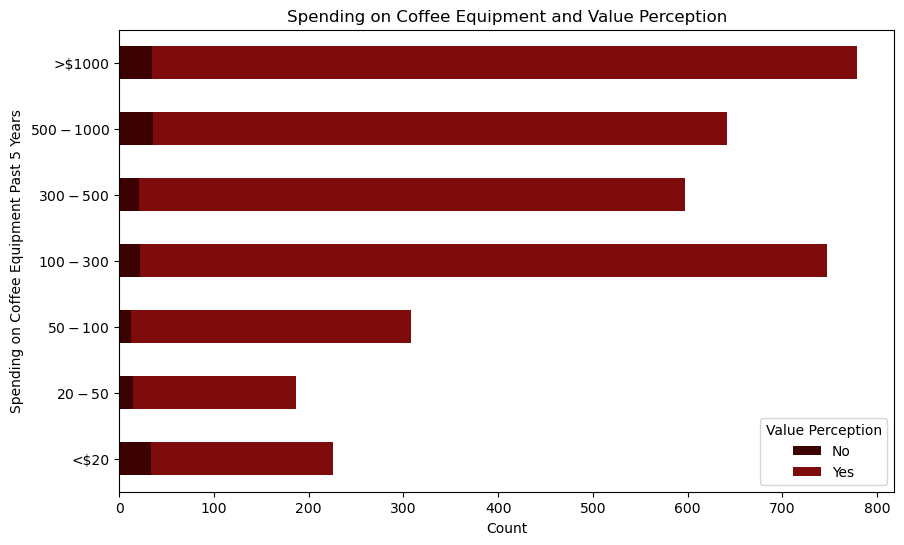

In [57]:
# Define the spending categories with their renamed labels
spending_order = ['<$20', '$20-$50', '$50-$100', '$100-$300', '$300-$500', '$500-$1000', '>$1000']
spending_labels = ['Less than $20', '$20-$50', '$50-$100', '$100-$300', '$300-$500', '$500-$1000', 'More than $1,000']

# Rename the 'spent on coffee equipment past 5 years' column categories
data['spent on coffee equipment past 5 years'] = data['spent on coffee equipment past 5 years'].replace(spending_labels, spending_order)

# Group the data by 'spent on coffee equipment past 5 years' and 'getting good value regards to your coffee equipment'
grouped_data = data.groupby(['spent on coffee equipment past 5 years', ' getting good value  regards to your coffee equipment']).size().unstack(fill_value=0)

# Reorder the index according to the defined order
grouped_data = grouped_data.reindex(spending_order)

# Plot the horizontal stacked bar chart with specified colors
grouped_data.plot(kind='barh', stacked=True, figsize=(10, 6), color=['#3c0101','#7f0c0c'])

# Set plot labels and title
plt.title('Spending on Coffee Equipment and Value Perception')
plt.xlabel('Count')
plt.ylabel('Spending on Coffee Equipment Past 5 Years')

# Set legend
plt.legend(title='Value Perception', loc='lower right')

# Show plot

plt.show()
